# GANs_1D

By Alberto Valdés

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

This notebook was devoloped in Google Colab using "T4 GPU".

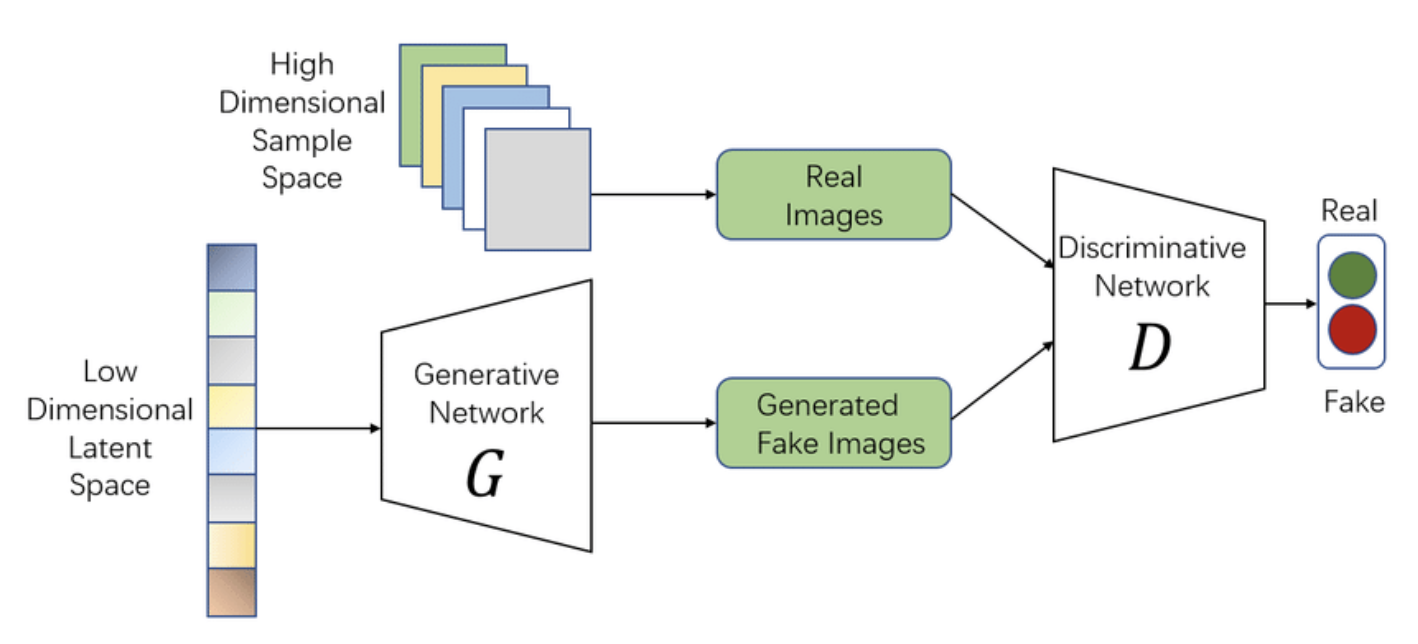

In [1]:
import time

In [2]:
def print_time_execution(start, end, txt):

  delta = int(end - start)

  hours = int(delta/3_600)
  mins = int((delta - 3_600*hours)/60)
  segs = int(delta - hours*3600 - mins*60)

  return f'{txt} it takes {hours} hours, {mins} mins and {segs} segs.'

### Start time of execution

In [3]:
start = time.time()

# 1. X^2

# a. Import Libraries

In [4]:
import numpy as np
from numpy import ones
from numpy import zeros
from numpy import hstack
from numpy.random import rand
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential

# b. Discriminator and Generator

In [5]:
def define_discriminator(n_inputs = 2, lr = 0.005):

  model = Sequential()

  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim = n_inputs))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = lr), metrics=['accuracy'])

  return model

In [6]:
def define_generator(latent_dim, n_outputs = 2):

  model = Sequential()

  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
  model.add(Dense(n_outputs, activation='linear'))

  return model

In [7]:
def define_gan(generator, discriminator):

  discriminator.trainable = False

  model = Sequential()

  model.add(generator)
  model.add(discriminator)

  model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = lr))

  return model

# c. Generate Data

In [8]:
def generate_real_samples(n):

  X1 = (rand(n) - 0.5)*10
  X2 = X1 * X1

  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)

  X = hstack((X1, X2))

  y = ones((n, 1))

  return X, y

In [9]:
def generate_latent_points(latent_dim, n):

  x_input = rand(latent_dim * n)

  x_input = x_input.reshape(n, latent_dim)

  return x_input

In [10]:
def generate_fake_samples(generator, latent_dim, n):

  x_input = generate_latent_points(latent_dim, n)

  X = generator.predict(x_input)

  y = zeros((n, 1))

  return X, y

# d. Summarize Performance

In [11]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n = 100):

  x_real, y_real = generate_real_samples(n)
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)

  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)

  print(epoch, acc_real, acc_fake)

  plt.scatter(x_real[:, 0], x_real[:, 1], color = 'blue', label = 'real')
  plt.scatter(x_fake[:, 0], x_fake[:, 1], color = 'red', label = 'fake')
  plt.show()

# e. Train

In [12]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs = 10_000, n_batch = 128, n_eval = 100):

  half_batch = int(n_batch / 2)

  for i in range(n_epochs):

    print(i)

    x_real, y_real = generate_real_samples(half_batch)

    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)

    x_gan = generate_latent_points(latent_dim, n_batch)
    y_gan = ones((n_batch, 1))

    gan_model.train_on_batch(x_gan, y_gan)

    if (i+1) % n_eval == 0:

      summarize_performance(i, g_model, d_model, latent_dim)

In [13]:
lr = 0.005
latent_dim = 5

discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)

0
2/2 [==============================] - 1s 9ms/step
1
2/2 [==============================] - 0s 7ms/step
2
2/2 [==============================] - 0s 20ms/step
3
2/2 [==============================] - 0s 8ms/step
4
2/2 [==============================] - 0s 7ms/step
5
2/2 [==============================] - 0s 7ms/step
6
2/2 [==============================] - 0s 4ms/step
7
2/2 [==============================] - 0s 12ms/step
8
2/2 [==============================] - 0s 7ms/step
9
2/2 [==============================] - 0s 8ms/step
10
2/2 [==============================] - 0s 7ms/step
11
2/2 [==============================] - 0s 8ms/step
12
2/2 [==============================] - 0s 9ms/step
13
2/2 [==============================] - 0s 4ms/step
14
2/2 [==============================] - 0s 8ms/step
15
2/2 [==============================] - 0s 4ms/step
16
2/2 [==============================] - 0s 5ms/step
17
2/2 [==============================] - 0s 4ms/step
18
2/2 [============================

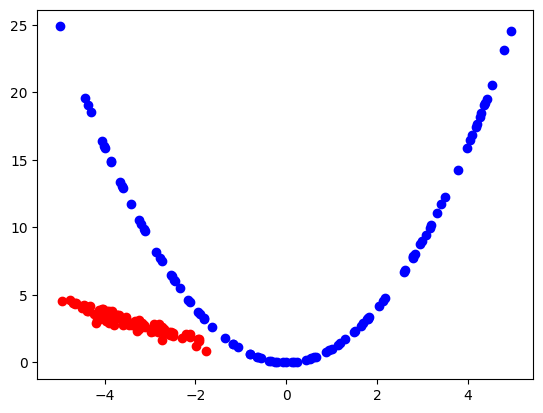

100
2/2 [==============================] - 0s 4ms/step
101
2/2 [==============================] - 0s 4ms/step
102
2/2 [==============================] - 0s 4ms/step
103
2/2 [==============================] - 0s 4ms/step
104
2/2 [==============================] - 0s 3ms/step
105
2/2 [==============================] - 0s 4ms/step
106
2/2 [==============================] - 0s 3ms/step
107
2/2 [==============================] - 0s 4ms/step
108
2/2 [==============================] - 0s 3ms/step
109
2/2 [==============================] - 0s 5ms/step
110
2/2 [==============================] - 0s 4ms/step
111
2/2 [==============================] - 0s 4ms/step
112
2/2 [==============================] - 0s 3ms/step
113
2/2 [==============================] - 0s 4ms/step
114
2/2 [==============================] - 0s 3ms/step
115
2/2 [==============================] - 0s 4ms/step
116
2/2 [==============================] - 0s 4ms/step
117
2/2 [==============================] - 0s 4ms/step
118
2/2 [=

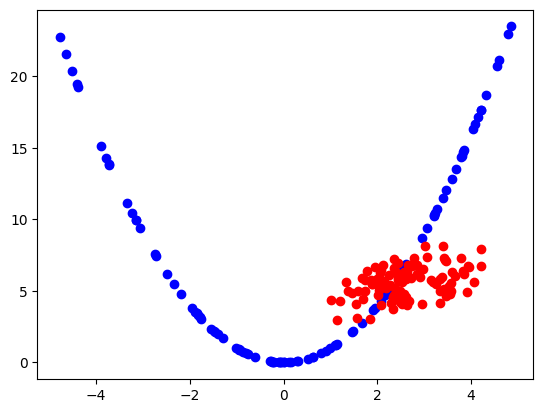

200
2/2 [==============================] - 0s 5ms/step
201
2/2 [==============================] - 0s 4ms/step
202
2/2 [==============================] - 0s 3ms/step
203
2/2 [==============================] - 0s 3ms/step
204
2/2 [==============================] - 0s 3ms/step
205
2/2 [==============================] - 0s 6ms/step
206
2/2 [==============================] - 0s 3ms/step
207
2/2 [==============================] - 0s 3ms/step
208
2/2 [==============================] - 0s 7ms/step
209
2/2 [==============================] - 0s 4ms/step
210
2/2 [==============================] - 0s 3ms/step
211
2/2 [==============================] - 0s 4ms/step
212
2/2 [==============================] - 0s 6ms/step
213
2/2 [==============================] - 0s 7ms/step
214
2/2 [==============================] - 0s 4ms/step
215
2/2 [==============================] - 0s 8ms/step
216
2/2 [==============================] - 0s 3ms/step
217
2/2 [==============================] - 0s 5ms/step
218
2/2 [=

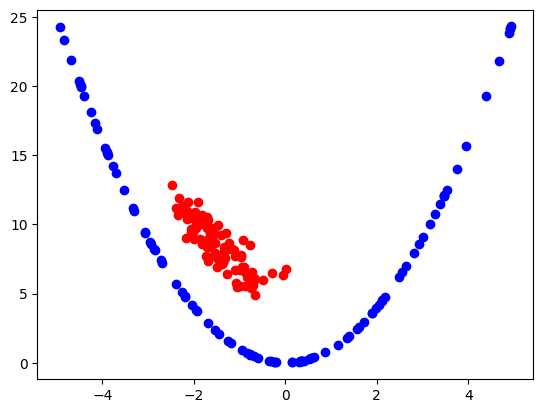

300
2/2 [==============================] - 0s 5ms/step
301
2/2 [==============================] - 0s 6ms/step
302
2/2 [==============================] - 0s 5ms/step
303
2/2 [==============================] - 0s 4ms/step
304
2/2 [==============================] - 0s 5ms/step
305
2/2 [==============================] - 0s 4ms/step
306
2/2 [==============================] - 0s 5ms/step
307
2/2 [==============================] - 0s 5ms/step
308
2/2 [==============================] - 0s 4ms/step
309
2/2 [==============================] - 0s 4ms/step
310
2/2 [==============================] - 0s 5ms/step
311
2/2 [==============================] - 0s 5ms/step
312
2/2 [==============================] - 0s 5ms/step
313
2/2 [==============================] - 0s 5ms/step
314
2/2 [==============================] - 0s 4ms/step
315
2/2 [==============================] - 0s 5ms/step
316
2/2 [==============================] - 0s 3ms/step
317
2/2 [==============================] - 0s 5ms/step
318
2/2 [=

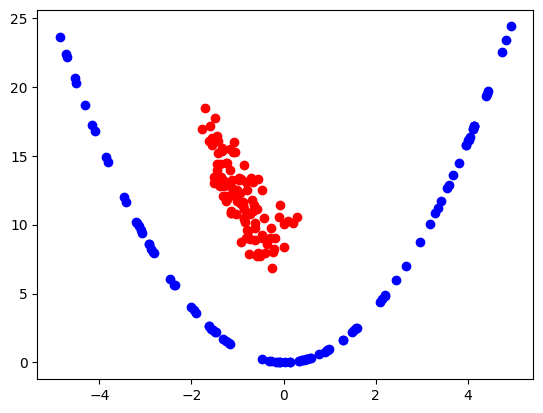

400
2/2 [==============================] - 0s 4ms/step
401
2/2 [==============================] - 0s 4ms/step
402
2/2 [==============================] - 0s 4ms/step
403
2/2 [==============================] - 0s 5ms/step
404
2/2 [==============================] - 0s 5ms/step
405
2/2 [==============================] - 0s 4ms/step
406
2/2 [==============================] - 0s 3ms/step
407
2/2 [==============================] - 0s 5ms/step
408
2/2 [==============================] - 0s 5ms/step
409
2/2 [==============================] - 0s 5ms/step
410
2/2 [==============================] - 0s 4ms/step
411
2/2 [==============================] - 0s 5ms/step
412
2/2 [==============================] - 0s 5ms/step
413
2/2 [==============================] - 0s 5ms/step
414
2/2 [==============================] - 0s 5ms/step
415
2/2 [==============================] - 0s 5ms/step
416
2/2 [==============================] - 0s 5ms/step
417
2/2 [==============================] - 0s 5ms/step
418
2/2 [=

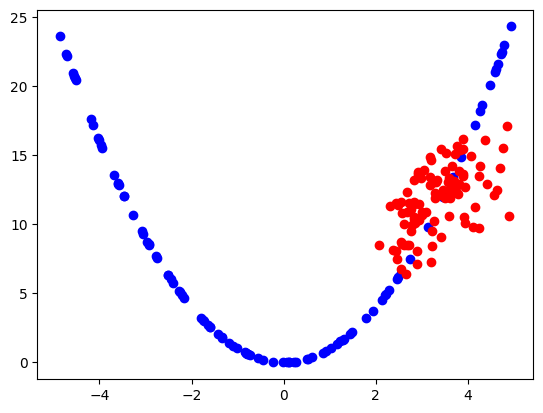

500
2/2 [==============================] - 0s 5ms/step
501
2/2 [==============================] - 0s 5ms/step
502
2/2 [==============================] - 0s 4ms/step
503
2/2 [==============================] - 0s 4ms/step
504
2/2 [==============================] - 0s 5ms/step
505
2/2 [==============================] - 0s 5ms/step
506
2/2 [==============================] - 0s 4ms/step
507
2/2 [==============================] - 0s 5ms/step
508
2/2 [==============================] - 0s 5ms/step
509
2/2 [==============================] - 0s 4ms/step
510
2/2 [==============================] - 0s 5ms/step
511
2/2 [==============================] - 0s 5ms/step
512
2/2 [==============================] - 0s 5ms/step
513
2/2 [==============================] - 0s 5ms/step
514
2/2 [==============================] - 0s 5ms/step
515
2/2 [==============================] - 0s 5ms/step
516
2/2 [==============================] - 0s 3ms/step
517
2/2 [==============================] - 0s 5ms/step
518
2/2 [=

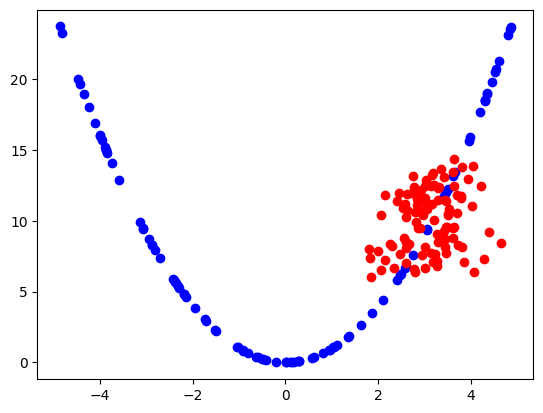

600
2/2 [==============================] - 0s 6ms/step
601
2/2 [==============================] - 0s 6ms/step
602
2/2 [==============================] - 0s 4ms/step
603
2/2 [==============================] - 0s 4ms/step
604
2/2 [==============================] - 0s 5ms/step
605
2/2 [==============================] - 0s 5ms/step
606
2/2 [==============================] - 0s 4ms/step
607
2/2 [==============================] - 0s 4ms/step
608
2/2 [==============================] - 0s 5ms/step
609
2/2 [==============================] - 0s 5ms/step
610
2/2 [==============================] - 0s 5ms/step
611
2/2 [==============================] - 0s 5ms/step
612
2/2 [==============================] - 0s 5ms/step
613
2/2 [==============================] - 0s 4ms/step
614
2/2 [==============================] - 0s 3ms/step
615
2/2 [==============================] - 0s 5ms/step
616
2/2 [==============================] - 0s 4ms/step
617
2/2 [==============================] - 0s 4ms/step
618
2/2 [=

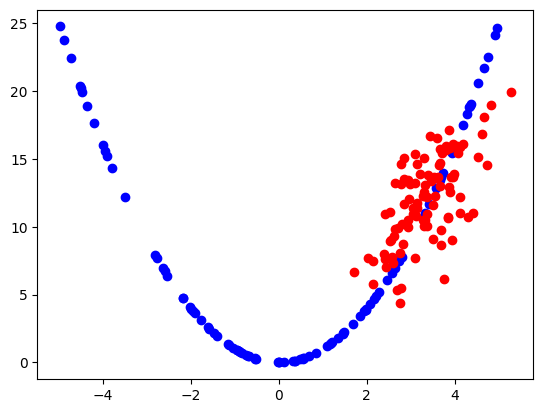

700
2/2 [==============================] - 0s 6ms/step
701
2/2 [==============================] - 0s 5ms/step
702
2/2 [==============================] - 0s 6ms/step
703
2/2 [==============================] - 0s 4ms/step
704
2/2 [==============================] - 0s 3ms/step
705
2/2 [==============================] - 0s 4ms/step
706
2/2 [==============================] - 0s 3ms/step
707
2/2 [==============================] - 0s 4ms/step
708
2/2 [==============================] - 0s 3ms/step
709
2/2 [==============================] - 0s 3ms/step
710
2/2 [==============================] - 0s 3ms/step
711
2/2 [==============================] - 0s 7ms/step
712
2/2 [==============================] - 0s 3ms/step
713
2/2 [==============================] - 0s 6ms/step
714
2/2 [==============================] - 0s 4ms/step
715
2/2 [==============================] - 0s 4ms/step
716
2/2 [==============================] - 0s 6ms/step
717
2/2 [==============================] - 0s 4ms/step
718
2/2 [=

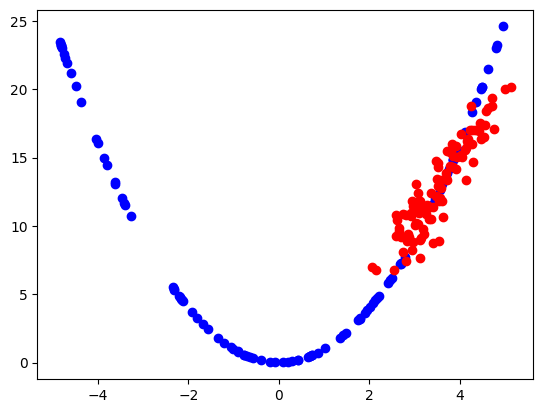

800
2/2 [==============================] - 0s 4ms/step
801
2/2 [==============================] - 0s 5ms/step
802
2/2 [==============================] - 0s 5ms/step
803
2/2 [==============================] - 0s 4ms/step
804
2/2 [==============================] - 0s 4ms/step
805
2/2 [==============================] - 0s 5ms/step
806
2/2 [==============================] - 0s 5ms/step
807
2/2 [==============================] - 0s 4ms/step
808
2/2 [==============================] - 0s 4ms/step
809
2/2 [==============================] - 0s 3ms/step
810
2/2 [==============================] - 0s 4ms/step
811
2/2 [==============================] - 0s 4ms/step
812
2/2 [==============================] - 0s 7ms/step
813
2/2 [==============================] - 0s 4ms/step
814
2/2 [==============================] - 0s 3ms/step
815
2/2 [==============================] - 0s 4ms/step
816
2/2 [==============================] - 0s 3ms/step
817
2/2 [==============================] - 0s 8ms/step
818
2/2 [=

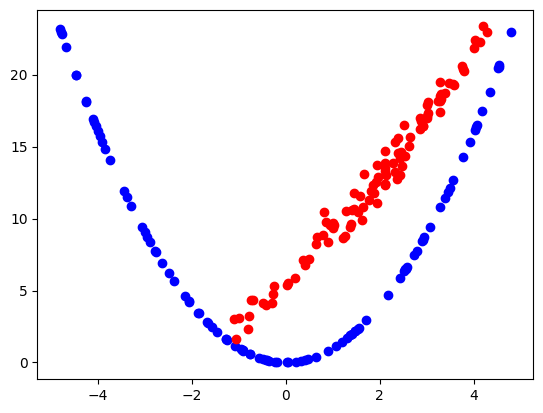

900
2/2 [==============================] - 0s 4ms/step
901
2/2 [==============================] - 0s 3ms/step
902
2/2 [==============================] - 0s 5ms/step
903
2/2 [==============================] - 0s 6ms/step
904
2/2 [==============================] - 0s 5ms/step
905
2/2 [==============================] - 0s 6ms/step
906
2/2 [==============================] - 0s 5ms/step
907
2/2 [==============================] - 0s 5ms/step
908
2/2 [==============================] - 0s 3ms/step
909
2/2 [==============================] - 0s 5ms/step
910
2/2 [==============================] - 0s 4ms/step
911
2/2 [==============================] - 0s 5ms/step
912
2/2 [==============================] - 0s 5ms/step
913
2/2 [==============================] - 0s 4ms/step
914
2/2 [==============================] - 0s 3ms/step
915
2/2 [==============================] - 0s 5ms/step
916
2/2 [==============================] - 0s 5ms/step
917
2/2 [==============================] - 0s 5ms/step
918
2/2 [=

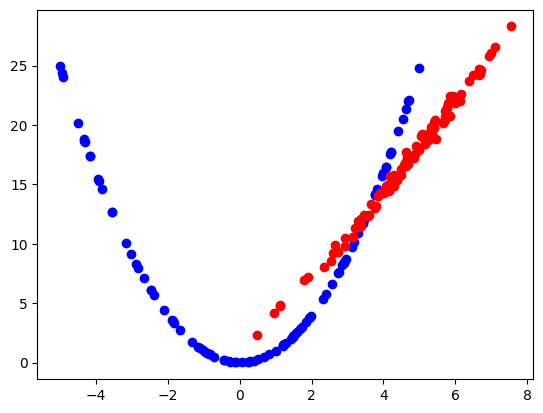

1000
2/2 [==============================] - 0s 5ms/step
1001
2/2 [==============================] - 0s 5ms/step
1002
2/2 [==============================] - 0s 4ms/step
1003
2/2 [==============================] - 0s 9ms/step
1004
2/2 [==============================] - 0s 5ms/step
1005
2/2 [==============================] - 0s 5ms/step
1006
2/2 [==============================] - 0s 5ms/step
1007
2/2 [==============================] - 0s 5ms/step
1008
2/2 [==============================] - 0s 6ms/step
1009
2/2 [==============================] - 0s 8ms/step
1010
2/2 [==============================] - 0s 4ms/step
1011
2/2 [==============================] - 0s 5ms/step
1012
2/2 [==============================] - 0s 5ms/step
1013
2/2 [==============================] - 0s 4ms/step
1014
2/2 [==============================] - 0s 3ms/step
1015
2/2 [==============================] - 0s 5ms/step
1016
2/2 [==============================] - 0s 10ms/step
1017
2/2 [==============================] - 0s 

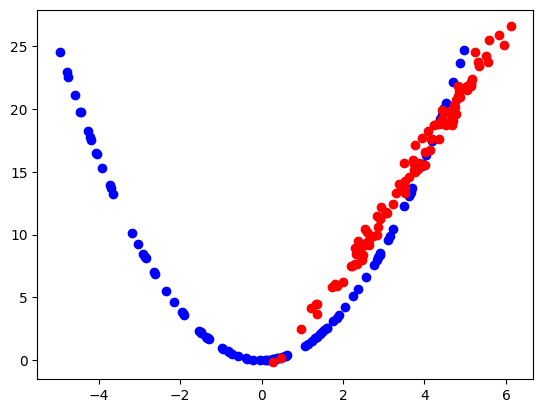

1100
2/2 [==============================] - 0s 4ms/step
1101
2/2 [==============================] - 0s 3ms/step
1102
2/2 [==============================] - 0s 5ms/step
1103
2/2 [==============================] - 0s 4ms/step
1104
2/2 [==============================] - 0s 4ms/step
1105
2/2 [==============================] - 0s 4ms/step
1106
2/2 [==============================] - 0s 5ms/step
1107
2/2 [==============================] - 0s 4ms/step
1108
2/2 [==============================] - 0s 4ms/step
1109
2/2 [==============================] - 0s 6ms/step
1110
2/2 [==============================] - 0s 5ms/step
1111
2/2 [==============================] - 0s 3ms/step
1112
2/2 [==============================] - 0s 4ms/step
1113
2/2 [==============================] - 0s 3ms/step
1114
2/2 [==============================] - 0s 3ms/step
1115
2/2 [==============================] - 0s 6ms/step
1116
2/2 [==============================] - 0s 5ms/step
1117
2/2 [==============================] - 0s 4

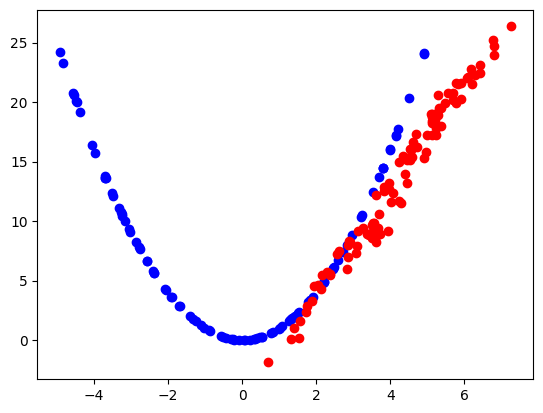

1200
2/2 [==============================] - 0s 5ms/step
1201
2/2 [==============================] - 0s 5ms/step
1202
2/2 [==============================] - 0s 4ms/step
1203
2/2 [==============================] - 0s 4ms/step
1204
2/2 [==============================] - 0s 5ms/step
1205
2/2 [==============================] - 0s 5ms/step
1206
2/2 [==============================] - 0s 5ms/step
1207
2/2 [==============================] - 0s 5ms/step
1208
2/2 [==============================] - 0s 5ms/step
1209
2/2 [==============================] - 0s 5ms/step
1210
2/2 [==============================] - 0s 5ms/step
1211
2/2 [==============================] - 0s 5ms/step
1212
2/2 [==============================] - 0s 5ms/step
1213
2/2 [==============================] - 0s 4ms/step
1214
2/2 [==============================] - 0s 5ms/step
1215
2/2 [==============================] - 0s 5ms/step
1216
2/2 [==============================] - 0s 4ms/step
1217
2/2 [==============================] - 0s 5

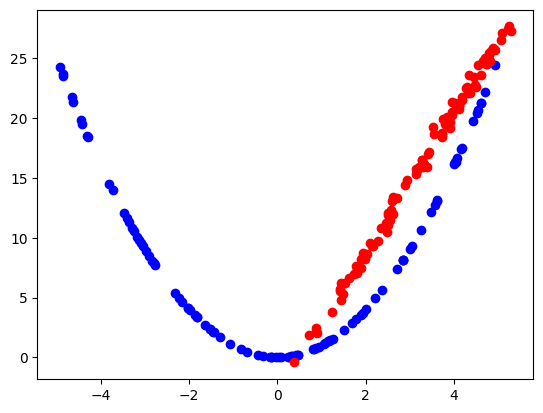

1300
2/2 [==============================] - 0s 4ms/step
1301
2/2 [==============================] - 0s 5ms/step
1302
2/2 [==============================] - 0s 3ms/step
1303
2/2 [==============================] - 0s 4ms/step
1304
2/2 [==============================] - 0s 4ms/step
1305
2/2 [==============================] - 0s 4ms/step
1306
2/2 [==============================] - 0s 4ms/step
1307
2/2 [==============================] - 0s 5ms/step
1308
2/2 [==============================] - 0s 8ms/step
1309
2/2 [==============================] - 0s 5ms/step
1310
2/2 [==============================] - 0s 3ms/step
1311
2/2 [==============================] - 0s 4ms/step
1312
2/2 [==============================] - 0s 4ms/step
1313
2/2 [==============================] - 0s 4ms/step
1314
2/2 [==============================] - 0s 4ms/step
1315
2/2 [==============================] - 0s 3ms/step
1316
2/2 [==============================] - 0s 5ms/step
1317
2/2 [==============================] - 0s 4

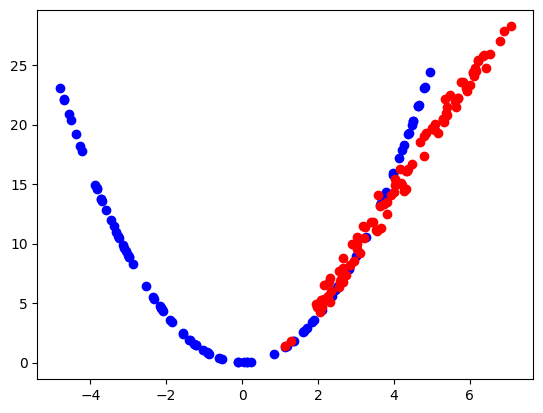

1400
2/2 [==============================] - 0s 3ms/step
1401
2/2 [==============================] - 0s 5ms/step
1402
2/2 [==============================] - 0s 5ms/step
1403
2/2 [==============================] - 0s 3ms/step
1404
2/2 [==============================] - 0s 4ms/step
1405
2/2 [==============================] - 0s 5ms/step
1406
2/2 [==============================] - 0s 5ms/step
1407
2/2 [==============================] - 0s 5ms/step
1408
2/2 [==============================] - 0s 4ms/step
1409
2/2 [==============================] - 0s 5ms/step
1410
2/2 [==============================] - 0s 4ms/step
1411
2/2 [==============================] - 0s 3ms/step
1412
2/2 [==============================] - 0s 4ms/step
1413
2/2 [==============================] - 0s 5ms/step
1414
2/2 [==============================] - 0s 4ms/step
1415
2/2 [==============================] - 0s 4ms/step
1416
2/2 [==============================] - 0s 4ms/step
1417
2/2 [==============================] - 0s 4

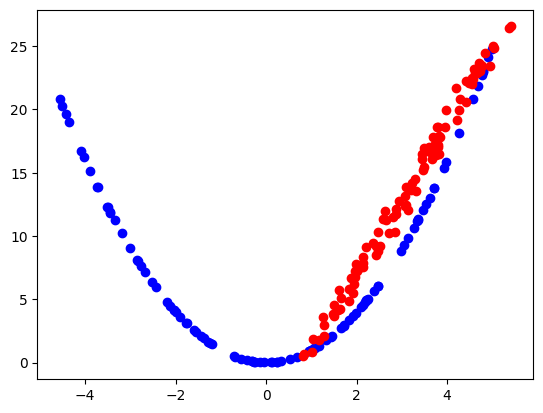

1500
2/2 [==============================] - 0s 4ms/step
1501
2/2 [==============================] - 0s 6ms/step
1502
2/2 [==============================] - 0s 8ms/step
1503
2/2 [==============================] - 0s 3ms/step
1504
2/2 [==============================] - 0s 4ms/step
1505
2/2 [==============================] - 0s 5ms/step
1506
2/2 [==============================] - 0s 5ms/step
1507
2/2 [==============================] - 0s 3ms/step
1508
2/2 [==============================] - 0s 4ms/step
1509
2/2 [==============================] - 0s 4ms/step
1510
2/2 [==============================] - 0s 4ms/step
1511
2/2 [==============================] - 0s 5ms/step
1512
2/2 [==============================] - 0s 5ms/step
1513
2/2 [==============================] - 0s 5ms/step
1514
2/2 [==============================] - 0s 5ms/step
1515
2/2 [==============================] - 0s 6ms/step
1516
2/2 [==============================] - 0s 5ms/step
1517
2/2 [==============================] - 0s 5

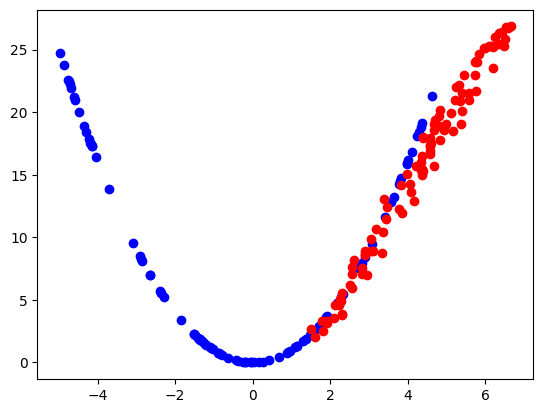

1600
2/2 [==============================] - 0s 5ms/step
1601
2/2 [==============================] - 0s 5ms/step
1602
2/2 [==============================] - 0s 6ms/step
1603
2/2 [==============================] - 0s 4ms/step
1604
2/2 [==============================] - 0s 4ms/step
1605
2/2 [==============================] - 0s 4ms/step
1606
2/2 [==============================] - 0s 5ms/step
1607
2/2 [==============================] - 0s 4ms/step
1608
2/2 [==============================] - 0s 3ms/step
1609
2/2 [==============================] - 0s 5ms/step
1610
2/2 [==============================] - 0s 4ms/step
1611
2/2 [==============================] - 0s 4ms/step
1612
2/2 [==============================] - 0s 5ms/step
1613
2/2 [==============================] - 0s 4ms/step
1614
2/2 [==============================] - 0s 4ms/step
1615
2/2 [==============================] - 0s 4ms/step
1616
2/2 [==============================] - 0s 5ms/step
1617
2/2 [==============================] - 0s 4

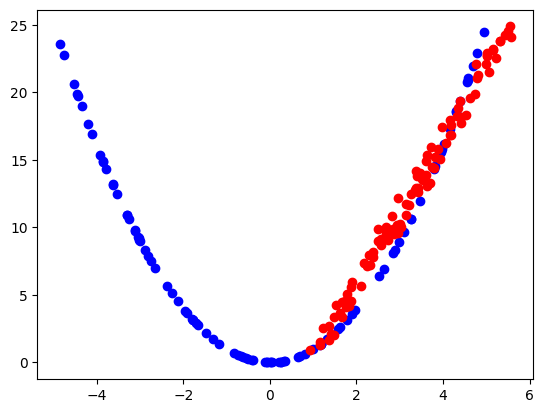

1700
2/2 [==============================] - 0s 4ms/step
1701
2/2 [==============================] - 0s 3ms/step
1702
2/2 [==============================] - 0s 5ms/step
1703
2/2 [==============================] - 0s 5ms/step
1704
2/2 [==============================] - 0s 4ms/step
1705
2/2 [==============================] - 0s 3ms/step
1706
2/2 [==============================] - 0s 4ms/step
1707
2/2 [==============================] - 0s 4ms/step
1708
2/2 [==============================] - 0s 5ms/step
1709
2/2 [==============================] - 0s 5ms/step
1710
2/2 [==============================] - 0s 6ms/step
1711
2/2 [==============================] - 0s 3ms/step
1712
2/2 [==============================] - 0s 4ms/step
1713
2/2 [==============================] - 0s 5ms/step
1714
2/2 [==============================] - 0s 5ms/step
1715
2/2 [==============================] - 0s 5ms/step
1716
2/2 [==============================] - 0s 5ms/step
1717
2/2 [==============================] - 0s 4

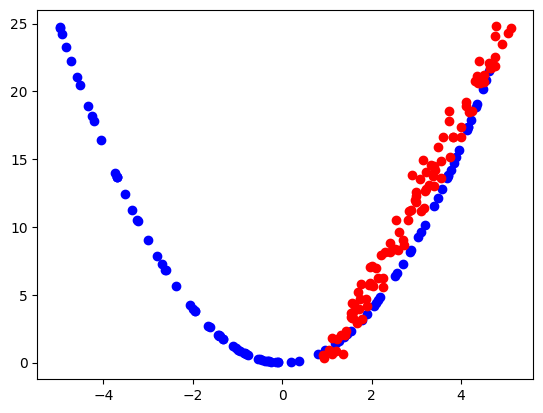

1800
2/2 [==============================] - 0s 4ms/step
1801
2/2 [==============================] - 0s 5ms/step
1802
2/2 [==============================] - 0s 4ms/step
1803
2/2 [==============================] - 0s 5ms/step
1804
2/2 [==============================] - 0s 4ms/step
1805
2/2 [==============================] - 0s 3ms/step
1806
2/2 [==============================] - 0s 4ms/step
1807
2/2 [==============================] - 0s 5ms/step
1808
2/2 [==============================] - 0s 4ms/step
1809
2/2 [==============================] - 0s 4ms/step
1810
2/2 [==============================] - 0s 4ms/step
1811
2/2 [==============================] - 0s 4ms/step
1812
2/2 [==============================] - 0s 4ms/step
1813
2/2 [==============================] - 0s 4ms/step
1814
2/2 [==============================] - 0s 4ms/step
1815
2/2 [==============================] - 0s 3ms/step
1816
2/2 [==============================] - 0s 4ms/step
1817
2/2 [==============================] - 0s 5

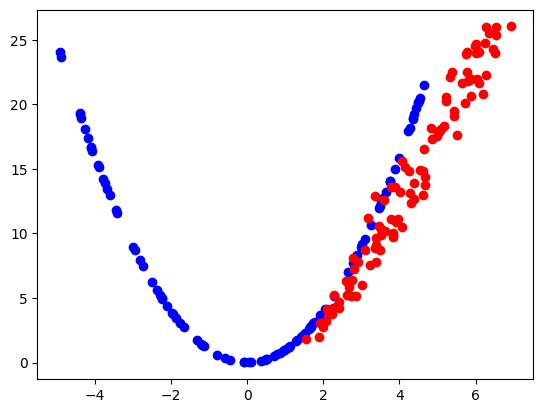

1900
2/2 [==============================] - 0s 4ms/step
1901
2/2 [==============================] - 0s 5ms/step
1902
2/2 [==============================] - 0s 4ms/step
1903
2/2 [==============================] - 0s 5ms/step
1904
2/2 [==============================] - 0s 6ms/step
1905
2/2 [==============================] - 0s 4ms/step
1906
2/2 [==============================] - 0s 7ms/step
1907
2/2 [==============================] - 0s 3ms/step
1908
2/2 [==============================] - 0s 6ms/step
1909
2/2 [==============================] - 0s 9ms/step
1910
2/2 [==============================] - 0s 4ms/step
1911
2/2 [==============================] - 0s 4ms/step
1912
2/2 [==============================] - 0s 4ms/step
1913
2/2 [==============================] - 0s 4ms/step
1914
2/2 [==============================] - 0s 8ms/step
1915
2/2 [==============================] - 0s 3ms/step
1916
2/2 [==============================] - 0s 4ms/step
1917
2/2 [==============================] - 0s 3

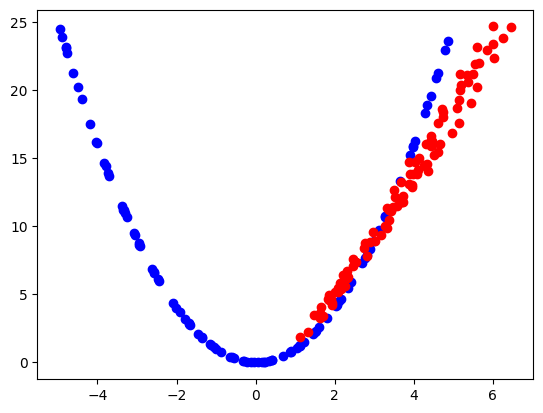

2000
2/2 [==============================] - 0s 3ms/step
2001
2/2 [==============================] - 0s 4ms/step
2002
2/2 [==============================] - 0s 3ms/step
2003
2/2 [==============================] - 0s 3ms/step
2004
2/2 [==============================] - 0s 3ms/step
2005
2/2 [==============================] - 0s 4ms/step
2006
2/2 [==============================] - 0s 4ms/step
2007
2/2 [==============================] - 0s 4ms/step
2008
2/2 [==============================] - 0s 4ms/step
2009
2/2 [==============================] - 0s 4ms/step
2010
2/2 [==============================] - 0s 3ms/step
2011
2/2 [==============================] - 0s 5ms/step
2012
2/2 [==============================] - 0s 5ms/step
2013
2/2 [==============================] - 0s 5ms/step
2014
2/2 [==============================] - 0s 7ms/step
2015
2/2 [==============================] - 0s 7ms/step
2016
2/2 [==============================] - 0s 4ms/step
2017
2/2 [==============================] - 0s 4

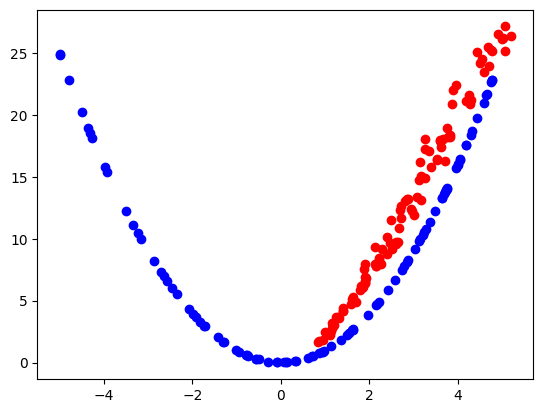

2100
2/2 [==============================] - 0s 3ms/step
2101
2/2 [==============================] - 0s 3ms/step
2102
2/2 [==============================] - 0s 4ms/step
2103
2/2 [==============================] - 0s 5ms/step
2104
2/2 [==============================] - 0s 4ms/step
2105
2/2 [==============================] - 0s 5ms/step
2106
2/2 [==============================] - 0s 4ms/step
2107
2/2 [==============================] - 0s 5ms/step
2108
2/2 [==============================] - 0s 8ms/step
2109
2/2 [==============================] - 0s 3ms/step
2110
2/2 [==============================] - 0s 4ms/step
2111
2/2 [==============================] - 0s 5ms/step
2112
2/2 [==============================] - 0s 5ms/step
2113
2/2 [==============================] - 0s 6ms/step
2114
2/2 [==============================] - 0s 3ms/step
2115
2/2 [==============================] - 0s 6ms/step
2116
2/2 [==============================] - 0s 5ms/step
2117
2/2 [==============================] - 0s 4

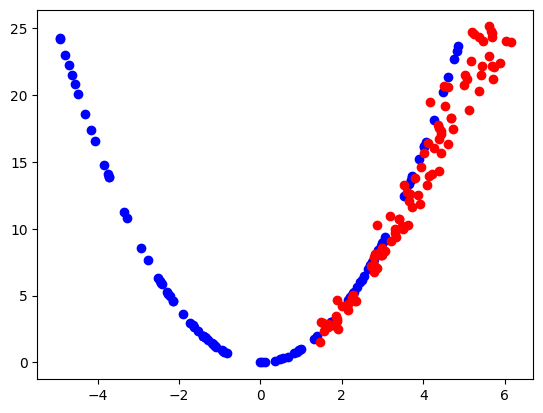

2200
2/2 [==============================] - 0s 3ms/step
2201
2/2 [==============================] - 0s 3ms/step
2202
2/2 [==============================] - 0s 5ms/step
2203
2/2 [==============================] - 0s 4ms/step
2204
2/2 [==============================] - 0s 5ms/step
2205
2/2 [==============================] - 0s 6ms/step
2206
2/2 [==============================] - 0s 7ms/step
2207
2/2 [==============================] - 0s 4ms/step
2208
2/2 [==============================] - 0s 4ms/step
2209
2/2 [==============================] - 0s 4ms/step
2210
2/2 [==============================] - 0s 3ms/step
2211
2/2 [==============================] - 0s 4ms/step
2212
2/2 [==============================] - 0s 4ms/step
2213
2/2 [==============================] - 0s 4ms/step
2214
2/2 [==============================] - 0s 4ms/step
2215
2/2 [==============================] - 0s 4ms/step
2216
2/2 [==============================] - 0s 4ms/step
2217
2/2 [==============================] - 0s 3

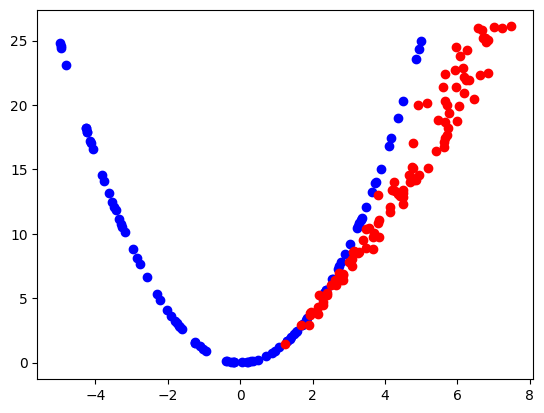

2300
2/2 [==============================] - 0s 4ms/step
2301
2/2 [==============================] - 0s 5ms/step
2302
2/2 [==============================] - 0s 4ms/step
2303
2/2 [==============================] - 0s 4ms/step
2304
2/2 [==============================] - 0s 4ms/step
2305
2/2 [==============================] - 0s 6ms/step
2306
2/2 [==============================] - 0s 4ms/step
2307
2/2 [==============================] - 0s 5ms/step
2308
2/2 [==============================] - 0s 4ms/step
2309
2/2 [==============================] - 0s 4ms/step
2310
2/2 [==============================] - 0s 3ms/step
2311
2/2 [==============================] - 0s 4ms/step
2312
2/2 [==============================] - 0s 3ms/step
2313
2/2 [==============================] - 0s 4ms/step
2314
2/2 [==============================] - 0s 5ms/step
2315
2/2 [==============================] - 0s 4ms/step
2316
2/2 [==============================] - 0s 4ms/step
2317
2/2 [==============================] - 0s 2

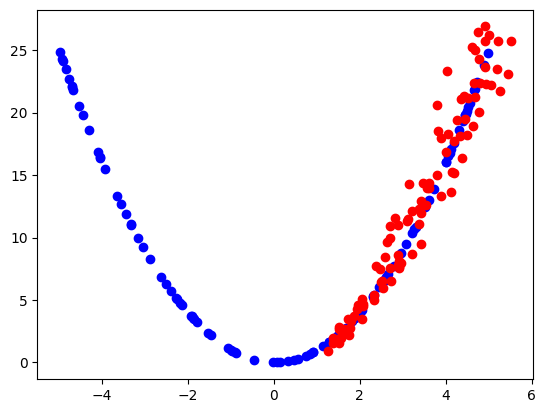

2400
2/2 [==============================] - 0s 5ms/step
2401
2/2 [==============================] - 0s 5ms/step
2402
2/2 [==============================] - 0s 3ms/step
2403
2/2 [==============================] - 0s 3ms/step
2404
2/2 [==============================] - 0s 4ms/step
2405
2/2 [==============================] - 0s 3ms/step
2406
2/2 [==============================] - 0s 4ms/step
2407
2/2 [==============================] - 0s 4ms/step
2408
2/2 [==============================] - 0s 4ms/step
2409
2/2 [==============================] - 0s 4ms/step
2410
2/2 [==============================] - 0s 4ms/step
2411
2/2 [==============================] - 0s 5ms/step
2412
2/2 [==============================] - 0s 5ms/step
2413
2/2 [==============================] - 0s 4ms/step
2414
2/2 [==============================] - 0s 4ms/step
2415
2/2 [==============================] - 0s 4ms/step
2416
2/2 [==============================] - 0s 4ms/step
2417
2/2 [==============================] - 0s 4

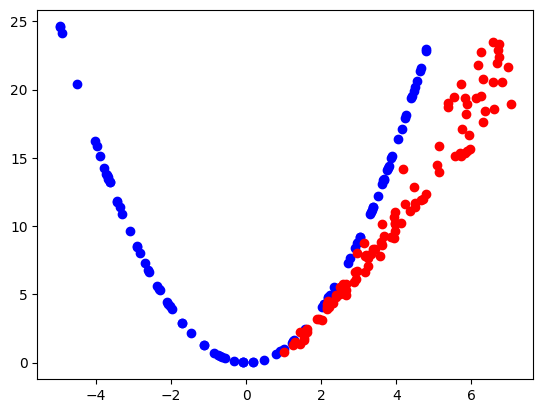

2500
2/2 [==============================] - 0s 9ms/step
2501
2/2 [==============================] - 0s 4ms/step
2502
2/2 [==============================] - 0s 8ms/step
2503
2/2 [==============================] - 0s 5ms/step
2504
2/2 [==============================] - 0s 4ms/step
2505
2/2 [==============================] - 0s 4ms/step
2506
2/2 [==============================] - 0s 4ms/step
2507
2/2 [==============================] - 0s 4ms/step
2508
2/2 [==============================] - 0s 4ms/step
2509
2/2 [==============================] - 0s 4ms/step
2510
2/2 [==============================] - 0s 5ms/step
2511
2/2 [==============================] - 0s 6ms/step
2512
2/2 [==============================] - 0s 3ms/step
2513
2/2 [==============================] - 0s 5ms/step
2514
2/2 [==============================] - 0s 4ms/step
2515
2/2 [==============================] - 0s 4ms/step
2516
2/2 [==============================] - 0s 4ms/step
2517
2/2 [==============================] - 0s 4

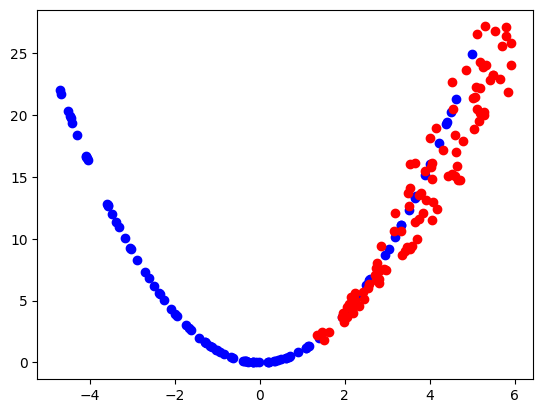

2600
2/2 [==============================] - 0s 4ms/step
2601
2/2 [==============================] - 0s 8ms/step
2602
2/2 [==============================] - 0s 4ms/step
2603
2/2 [==============================] - 0s 5ms/step
2604
2/2 [==============================] - 0s 3ms/step
2605
2/2 [==============================] - 0s 4ms/step
2606
2/2 [==============================] - 0s 4ms/step
2607
2/2 [==============================] - 0s 4ms/step
2608
2/2 [==============================] - 0s 9ms/step
2609
2/2 [==============================] - 0s 3ms/step
2610
2/2 [==============================] - 0s 4ms/step
2611
2/2 [==============================] - 0s 5ms/step
2612
2/2 [==============================] - 0s 4ms/step
2613
2/2 [==============================] - 0s 3ms/step
2614
2/2 [==============================] - 0s 4ms/step
2615
2/2 [==============================] - 0s 3ms/step
2616
2/2 [==============================] - 0s 3ms/step
2617
2/2 [==============================] - 0s 4

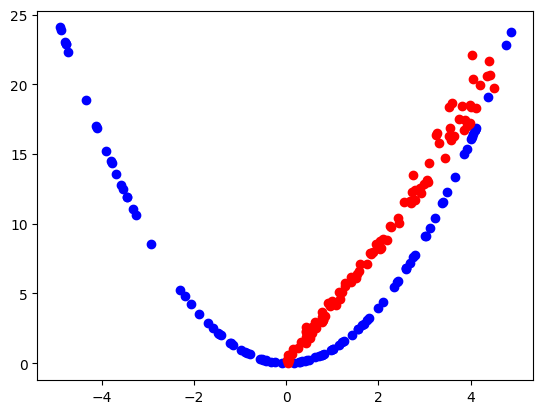

2700
2/2 [==============================] - 0s 4ms/step
2701
2/2 [==============================] - 0s 4ms/step
2702
2/2 [==============================] - 0s 4ms/step
2703
2/2 [==============================] - 0s 5ms/step
2704
2/2 [==============================] - 0s 3ms/step
2705
2/2 [==============================] - 0s 4ms/step
2706
2/2 [==============================] - 0s 5ms/step
2707
2/2 [==============================] - 0s 4ms/step
2708
2/2 [==============================] - 0s 4ms/step
2709
2/2 [==============================] - 0s 4ms/step
2710
2/2 [==============================] - 0s 4ms/step
2711
2/2 [==============================] - 0s 4ms/step
2712
2/2 [==============================] - 0s 4ms/step
2713
2/2 [==============================] - 0s 4ms/step
2714
2/2 [==============================] - 0s 5ms/step
2715
2/2 [==============================] - 0s 4ms/step
2716
2/2 [==============================] - 0s 3ms/step
2717
2/2 [==============================] - 0s 4

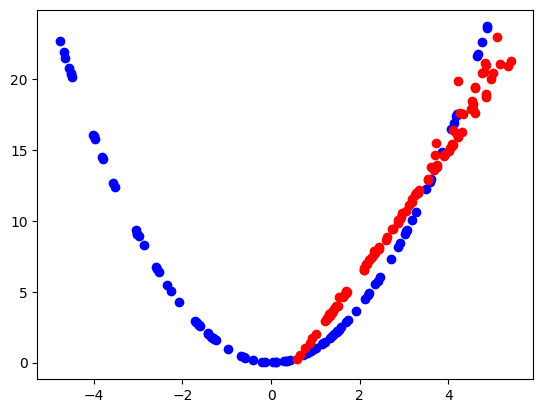

2800
2/2 [==============================] - 0s 3ms/step
2801
2/2 [==============================] - 0s 5ms/step
2802
2/2 [==============================] - 0s 3ms/step
2803
2/2 [==============================] - 0s 5ms/step
2804
2/2 [==============================] - 0s 5ms/step
2805
2/2 [==============================] - 0s 3ms/step
2806
2/2 [==============================] - 0s 4ms/step
2807
2/2 [==============================] - 0s 3ms/step
2808
2/2 [==============================] - 0s 5ms/step
2809
2/2 [==============================] - 0s 4ms/step
2810
2/2 [==============================] - 0s 7ms/step
2811
2/2 [==============================] - 0s 3ms/step
2812
2/2 [==============================] - 0s 3ms/step
2813
2/2 [==============================] - 0s 5ms/step
2814
2/2 [==============================] - 0s 6ms/step
2815
2/2 [==============================] - 0s 4ms/step
2816
2/2 [==============================] - 0s 3ms/step
2817
2/2 [==============================] - 0s 4

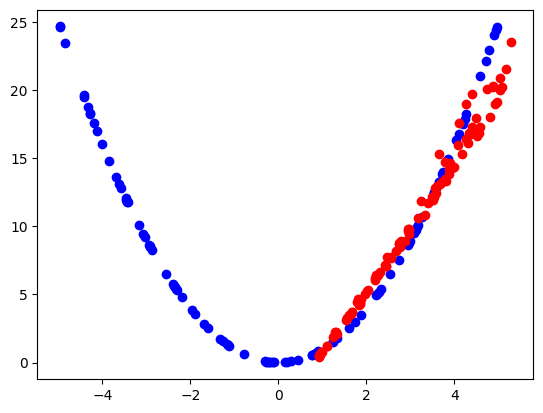

2900
2/2 [==============================] - 0s 4ms/step
2901
2/2 [==============================] - 0s 5ms/step
2902
2/2 [==============================] - 0s 4ms/step
2903
2/2 [==============================] - 0s 4ms/step
2904
2/2 [==============================] - 0s 4ms/step
2905
2/2 [==============================] - 0s 6ms/step
2906
2/2 [==============================] - 0s 3ms/step
2907
2/2 [==============================] - 0s 3ms/step
2908
2/2 [==============================] - 0s 4ms/step
2909
2/2 [==============================] - 0s 4ms/step
2910
2/2 [==============================] - 0s 5ms/step
2911
2/2 [==============================] - 0s 5ms/step
2912
2/2 [==============================] - 0s 5ms/step
2913
2/2 [==============================] - 0s 5ms/step
2914
2/2 [==============================] - 0s 4ms/step
2915
2/2 [==============================] - 0s 5ms/step
2916
2/2 [==============================] - 0s 5ms/step
2917
2/2 [==============================] - 0s 5

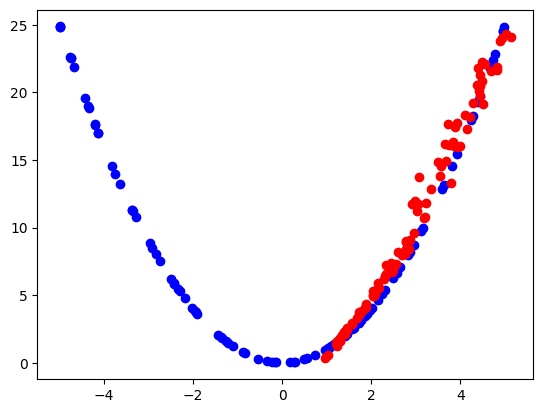

3000
2/2 [==============================] - 0s 4ms/step
3001
2/2 [==============================] - 0s 5ms/step
3002
2/2 [==============================] - 0s 4ms/step
3003
2/2 [==============================] - 0s 5ms/step
3004
2/2 [==============================] - 0s 5ms/step
3005
2/2 [==============================] - 0s 5ms/step
3006
2/2 [==============================] - 0s 4ms/step
3007
2/2 [==============================] - 0s 3ms/step
3008
2/2 [==============================] - 0s 4ms/step
3009
2/2 [==============================] - 0s 4ms/step
3010
2/2 [==============================] - 0s 4ms/step
3011
2/2 [==============================] - 0s 5ms/step
3012
2/2 [==============================] - 0s 4ms/step
3013
2/2 [==============================] - 0s 4ms/step
3014
2/2 [==============================] - 0s 4ms/step
3015
2/2 [==============================] - 0s 4ms/step
3016
2/2 [==============================] - 0s 5ms/step
3017
2/2 [==============================] - 0s 3

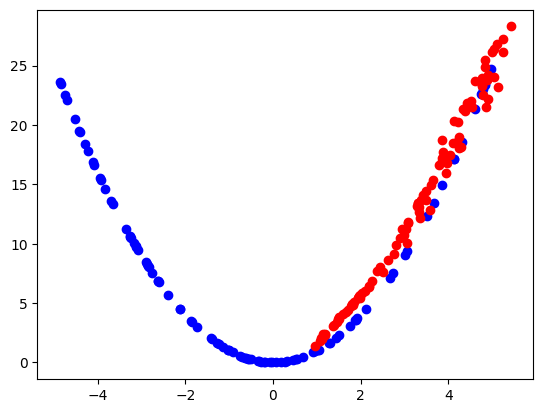

3100
2/2 [==============================] - 0s 4ms/step
3101
2/2 [==============================] - 0s 4ms/step
3102
2/2 [==============================] - 0s 4ms/step
3103
2/2 [==============================] - 0s 3ms/step
3104
2/2 [==============================] - 0s 3ms/step
3105
2/2 [==============================] - 0s 5ms/step
3106
2/2 [==============================] - 0s 4ms/step
3107
2/2 [==============================] - 0s 5ms/step
3108
2/2 [==============================] - 0s 4ms/step
3109
2/2 [==============================] - 0s 7ms/step
3110
2/2 [==============================] - 0s 3ms/step
3111
2/2 [==============================] - 0s 5ms/step
3112
2/2 [==============================] - 0s 5ms/step
3113
2/2 [==============================] - 0s 4ms/step
3114
2/2 [==============================] - 0s 5ms/step
3115
2/2 [==============================] - 0s 4ms/step
3116
2/2 [==============================] - 0s 4ms/step
3117
2/2 [==============================] - 0s 3

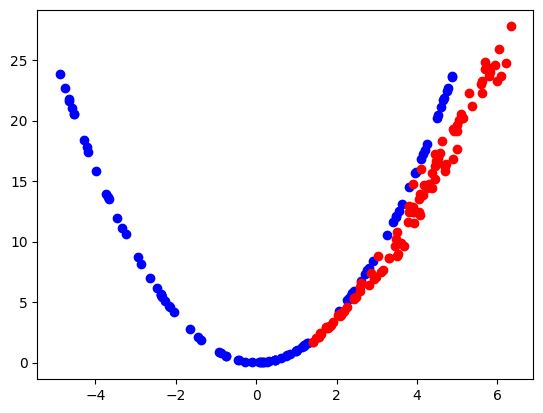

3200
2/2 [==============================] - 0s 3ms/step
3201
2/2 [==============================] - 0s 3ms/step
3202
2/2 [==============================] - 0s 3ms/step
3203
2/2 [==============================] - 0s 4ms/step
3204
2/2 [==============================] - 0s 5ms/step
3205
2/2 [==============================] - 0s 4ms/step
3206
2/2 [==============================] - 0s 4ms/step
3207
2/2 [==============================] - 0s 3ms/step
3208
2/2 [==============================] - 0s 6ms/step
3209
2/2 [==============================] - 0s 3ms/step
3210
2/2 [==============================] - 0s 4ms/step
3211
2/2 [==============================] - 0s 4ms/step
3212
2/2 [==============================] - 0s 4ms/step
3213
2/2 [==============================] - 0s 3ms/step
3214
2/2 [==============================] - 0s 5ms/step
3215
2/2 [==============================] - 0s 3ms/step
3216
2/2 [==============================] - 0s 4ms/step
3217
2/2 [==============================] - 0s 3

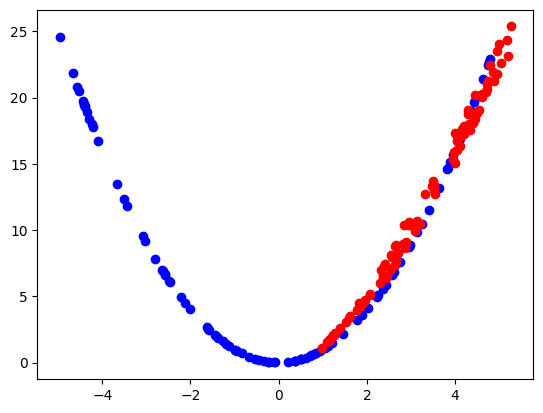

3300
2/2 [==============================] - 0s 4ms/step
3301
2/2 [==============================] - 0s 5ms/step
3302
2/2 [==============================] - 0s 3ms/step
3303
2/2 [==============================] - 0s 5ms/step
3304
2/2 [==============================] - 0s 5ms/step
3305
2/2 [==============================] - 0s 5ms/step
3306
2/2 [==============================] - 0s 4ms/step
3307
2/2 [==============================] - 0s 4ms/step
3308
2/2 [==============================] - 0s 3ms/step
3309
2/2 [==============================] - 0s 4ms/step
3310
2/2 [==============================] - 0s 4ms/step
3311
2/2 [==============================] - 0s 4ms/step
3312
2/2 [==============================] - 0s 4ms/step
3313
2/2 [==============================] - 0s 4ms/step
3314
2/2 [==============================] - 0s 8ms/step
3315
2/2 [==============================] - 0s 5ms/step
3316
2/2 [==============================] - 0s 6ms/step
3317
2/2 [==============================] - 0s 5

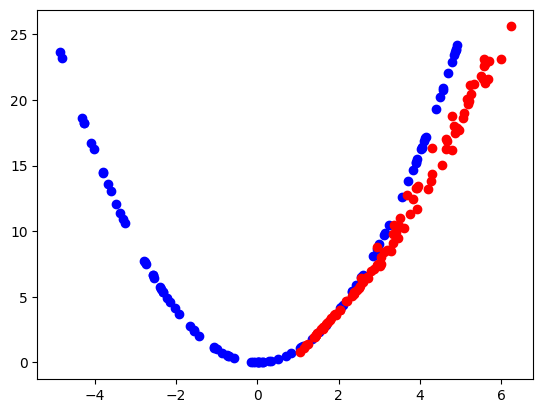

3400
2/2 [==============================] - 0s 5ms/step
3401
2/2 [==============================] - 0s 3ms/step
3402
2/2 [==============================] - 0s 4ms/step
3403
2/2 [==============================] - 0s 3ms/step
3404
2/2 [==============================] - 0s 7ms/step
3405
2/2 [==============================] - 0s 5ms/step
3406
2/2 [==============================] - 0s 4ms/step
3407
2/2 [==============================] - 0s 4ms/step
3408
2/2 [==============================] - 0s 4ms/step
3409
2/2 [==============================] - 0s 4ms/step
3410
2/2 [==============================] - 0s 4ms/step
3411
2/2 [==============================] - 0s 4ms/step
3412
2/2 [==============================] - 0s 4ms/step
3413
2/2 [==============================] - 0s 4ms/step
3414
2/2 [==============================] - 0s 3ms/step
3415
2/2 [==============================] - 0s 4ms/step
3416
2/2 [==============================] - 0s 4ms/step
3417
2/2 [==============================] - 0s 3

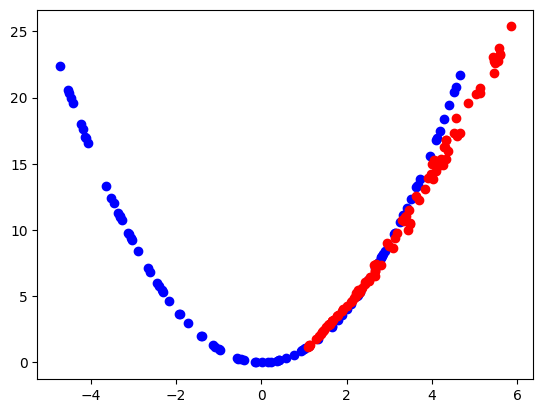

3500
2/2 [==============================] - 0s 5ms/step
3501
2/2 [==============================] - 0s 4ms/step
3502
2/2 [==============================] - 0s 3ms/step
3503
2/2 [==============================] - 0s 5ms/step
3504
2/2 [==============================] - 0s 5ms/step
3505
2/2 [==============================] - 0s 4ms/step
3506
2/2 [==============================] - 0s 4ms/step
3507
2/2 [==============================] - 0s 5ms/step
3508
2/2 [==============================] - 0s 4ms/step
3509
2/2 [==============================] - 0s 3ms/step
3510
2/2 [==============================] - 0s 5ms/step
3511
2/2 [==============================] - 0s 3ms/step
3512
2/2 [==============================] - 0s 4ms/step
3513
2/2 [==============================] - 0s 4ms/step
3514
2/2 [==============================] - 0s 3ms/step
3515
2/2 [==============================] - 0s 4ms/step
3516
2/2 [==============================] - 0s 5ms/step
3517
2/2 [==============================] - 0s 4

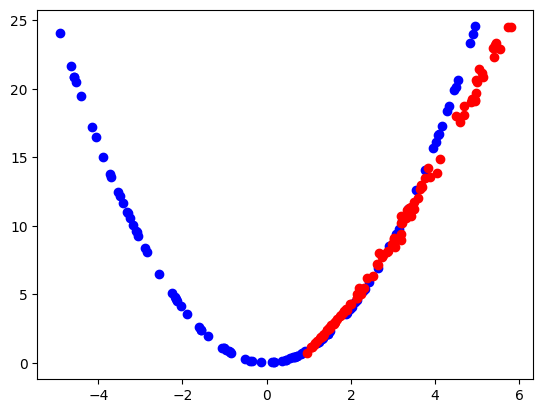

3600
2/2 [==============================] - 0s 5ms/step
3601
2/2 [==============================] - 0s 3ms/step
3602
2/2 [==============================] - 0s 5ms/step
3603
2/2 [==============================] - 0s 5ms/step
3604
2/2 [==============================] - 0s 5ms/step
3605
2/2 [==============================] - 0s 5ms/step
3606
2/2 [==============================] - 0s 3ms/step
3607
2/2 [==============================] - 0s 4ms/step
3608
2/2 [==============================] - 0s 7ms/step
3609
2/2 [==============================] - 0s 5ms/step
3610
2/2 [==============================] - 0s 3ms/step
3611
2/2 [==============================] - 0s 3ms/step
3612
2/2 [==============================] - 0s 3ms/step
3613
2/2 [==============================] - 0s 4ms/step
3614
2/2 [==============================] - 0s 4ms/step
3615
2/2 [==============================] - 0s 4ms/step
3616
2/2 [==============================] - 0s 3ms/step
3617
2/2 [==============================] - 0s 3

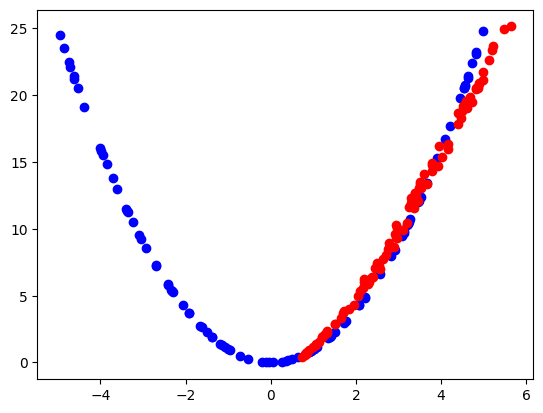

3700
2/2 [==============================] - 0s 3ms/step
3701
2/2 [==============================] - 0s 3ms/step
3702
2/2 [==============================] - 0s 4ms/step
3703
2/2 [==============================] - 0s 5ms/step
3704
2/2 [==============================] - 0s 6ms/step
3705
2/2 [==============================] - 0s 3ms/step
3706
2/2 [==============================] - 0s 5ms/step
3707
2/2 [==============================] - 0s 8ms/step
3708
2/2 [==============================] - 0s 4ms/step
3709
2/2 [==============================] - 0s 4ms/step
3710
2/2 [==============================] - 0s 7ms/step
3711
2/2 [==============================] - 0s 3ms/step
3712
2/2 [==============================] - 0s 3ms/step
3713
2/2 [==============================] - 0s 4ms/step
3714
2/2 [==============================] - 0s 5ms/step
3715
2/2 [==============================] - 0s 3ms/step
3716
2/2 [==============================] - 0s 4ms/step
3717
2/2 [==============================] - 0s 4

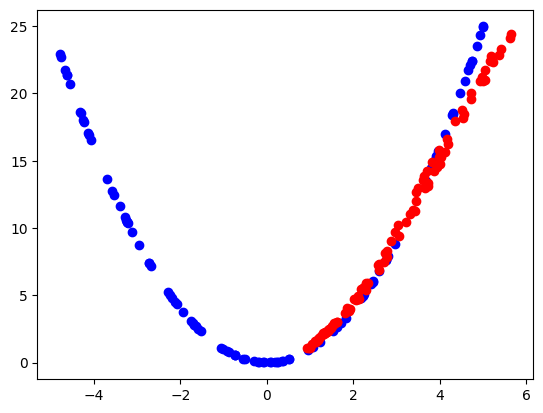

3800
2/2 [==============================] - 0s 4ms/step
3801
2/2 [==============================] - 0s 5ms/step
3802
2/2 [==============================] - 0s 3ms/step
3803
2/2 [==============================] - 0s 3ms/step
3804
2/2 [==============================] - 0s 5ms/step
3805
2/2 [==============================] - 0s 6ms/step
3806
2/2 [==============================] - 0s 5ms/step
3807
2/2 [==============================] - 0s 5ms/step
3808
2/2 [==============================] - 0s 4ms/step
3809
2/2 [==============================] - 0s 3ms/step
3810
2/2 [==============================] - 0s 6ms/step
3811
2/2 [==============================] - 0s 5ms/step
3812
2/2 [==============================] - 0s 4ms/step
3813
2/2 [==============================] - 0s 3ms/step
3814
2/2 [==============================] - 0s 4ms/step
3815
2/2 [==============================] - 0s 5ms/step
3816
2/2 [==============================] - 0s 4ms/step
3817
2/2 [==============================] - 0s 4

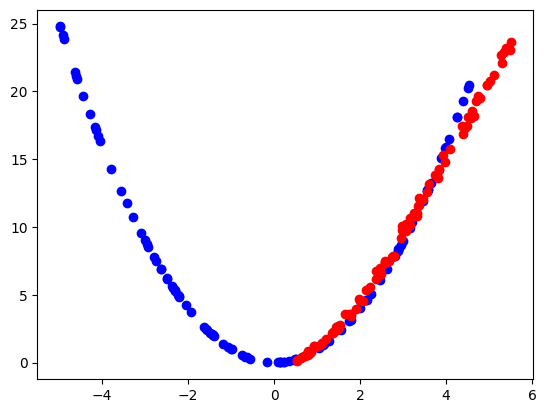

3900
2/2 [==============================] - 0s 4ms/step
3901
2/2 [==============================] - 0s 3ms/step
3902
2/2 [==============================] - 0s 3ms/step
3903
2/2 [==============================] - 0s 4ms/step
3904
2/2 [==============================] - 0s 3ms/step
3905
2/2 [==============================] - 0s 2ms/step
3906
2/2 [==============================] - 0s 4ms/step
3907
2/2 [==============================] - 0s 4ms/step
3908
2/2 [==============================] - 0s 4ms/step
3909
2/2 [==============================] - 0s 3ms/step
3910
2/2 [==============================] - 0s 4ms/step
3911
2/2 [==============================] - 0s 5ms/step
3912
2/2 [==============================] - 0s 3ms/step
3913
2/2 [==============================] - 0s 4ms/step
3914
2/2 [==============================] - 0s 4ms/step
3915
2/2 [==============================] - 0s 4ms/step
3916
2/2 [==============================] - 0s 6ms/step
3917
2/2 [==============================] - 0s 4

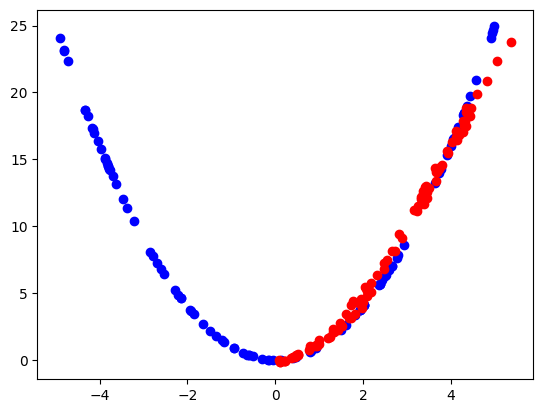

4000
2/2 [==============================] - 0s 3ms/step
4001
2/2 [==============================] - 0s 5ms/step
4002
2/2 [==============================] - 0s 3ms/step
4003
2/2 [==============================] - 0s 7ms/step
4004
2/2 [==============================] - 0s 4ms/step
4005
2/2 [==============================] - 0s 6ms/step
4006
2/2 [==============================] - 0s 4ms/step
4007
2/2 [==============================] - 0s 4ms/step
4008
2/2 [==============================] - 0s 5ms/step
4009
2/2 [==============================] - 0s 4ms/step
4010
2/2 [==============================] - 0s 8ms/step
4011
2/2 [==============================] - 0s 5ms/step
4012
2/2 [==============================] - 0s 3ms/step
4013
2/2 [==============================] - 0s 5ms/step
4014
2/2 [==============================] - 0s 5ms/step
4015
2/2 [==============================] - 0s 4ms/step
4016
2/2 [==============================] - 0s 4ms/step
4017
2/2 [==============================] - 0s 4

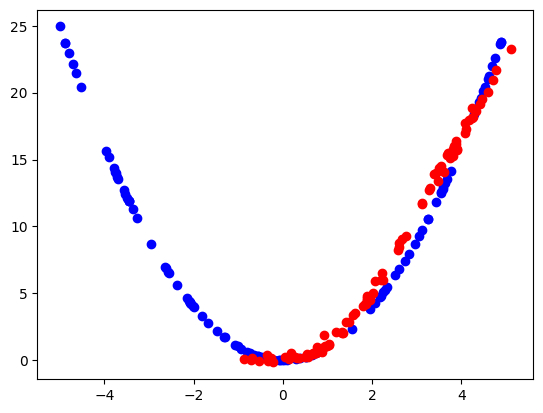

4100
2/2 [==============================] - 0s 4ms/step
4101
2/2 [==============================] - 0s 3ms/step
4102
2/2 [==============================] - 0s 5ms/step
4103
2/2 [==============================] - 0s 13ms/step
4104
2/2 [==============================] - 0s 5ms/step
4105
2/2 [==============================] - 0s 4ms/step
4106
2/2 [==============================] - 0s 5ms/step
4107
2/2 [==============================] - 0s 7ms/step
4108
2/2 [==============================] - 0s 7ms/step
4109
2/2 [==============================] - 0s 4ms/step
4110
2/2 [==============================] - 0s 3ms/step
4111
2/2 [==============================] - 0s 8ms/step
4112
2/2 [==============================] - 0s 4ms/step
4113
2/2 [==============================] - 0s 3ms/step
4114
2/2 [==============================] - 0s 4ms/step
4115
2/2 [==============================] - 0s 3ms/step
4116
2/2 [==============================] - 0s 8ms/step
4117
2/2 [==============================] - 0s 

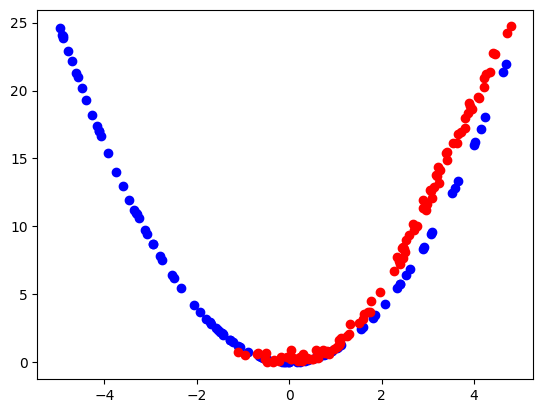

4200
2/2 [==============================] - 0s 4ms/step
4201
2/2 [==============================] - 0s 3ms/step
4202
2/2 [==============================] - 0s 3ms/step
4203
2/2 [==============================] - 0s 6ms/step
4204
2/2 [==============================] - 0s 4ms/step
4205
2/2 [==============================] - 0s 3ms/step
4206
2/2 [==============================] - 0s 3ms/step
4207
2/2 [==============================] - 0s 5ms/step
4208
2/2 [==============================] - 0s 4ms/step
4209
2/2 [==============================] - 0s 4ms/step
4210
2/2 [==============================] - 0s 5ms/step
4211
2/2 [==============================] - 0s 4ms/step
4212
2/2 [==============================] - 0s 4ms/step
4213
2/2 [==============================] - 0s 11ms/step
4214
2/2 [==============================] - 0s 3ms/step
4215
2/2 [==============================] - 0s 4ms/step
4216
2/2 [==============================] - 0s 4ms/step
4217
2/2 [==============================] - 0s 

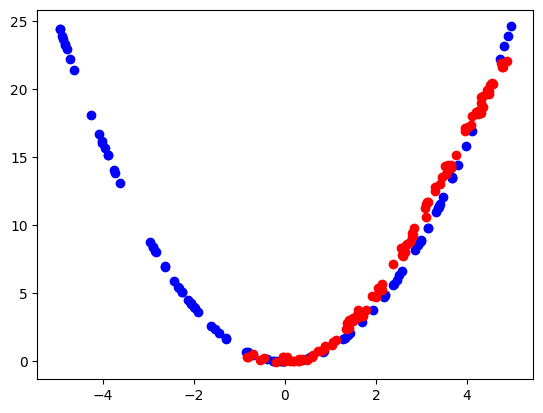

4300
2/2 [==============================] - 0s 7ms/step
4301
2/2 [==============================] - 0s 4ms/step
4302
2/2 [==============================] - 0s 5ms/step
4303
2/2 [==============================] - 0s 5ms/step
4304
2/2 [==============================] - 0s 4ms/step
4305
2/2 [==============================] - 0s 3ms/step
4306
2/2 [==============================] - 0s 6ms/step
4307
2/2 [==============================] - 0s 4ms/step
4308
2/2 [==============================] - 0s 4ms/step
4309
2/2 [==============================] - 0s 4ms/step
4310
2/2 [==============================] - 0s 4ms/step
4311
2/2 [==============================] - 0s 5ms/step
4312
2/2 [==============================] - 0s 4ms/step
4313
2/2 [==============================] - 0s 3ms/step
4314
2/2 [==============================] - 0s 5ms/step
4315
2/2 [==============================] - 0s 5ms/step
4316
2/2 [==============================] - 0s 3ms/step
4317
2/2 [==============================] - 0s 5

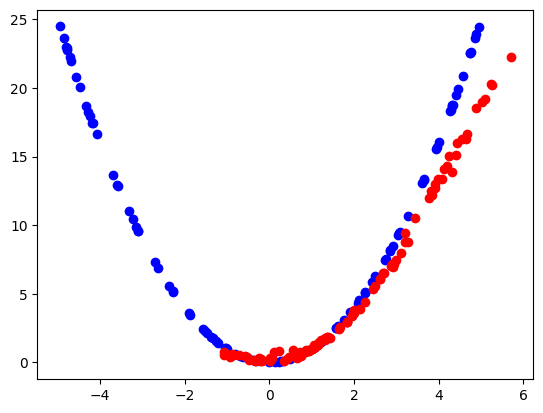

4400
2/2 [==============================] - 0s 4ms/step
4401
2/2 [==============================] - 0s 3ms/step
4402
2/2 [==============================] - 0s 4ms/step
4403
2/2 [==============================] - 0s 4ms/step
4404
2/2 [==============================] - 0s 3ms/step
4405
2/2 [==============================] - 0s 4ms/step
4406
2/2 [==============================] - 0s 4ms/step
4407
2/2 [==============================] - 0s 5ms/step
4408
2/2 [==============================] - 0s 6ms/step
4409
2/2 [==============================] - 0s 3ms/step
4410
2/2 [==============================] - 0s 3ms/step
4411
2/2 [==============================] - 0s 5ms/step
4412
2/2 [==============================] - 0s 4ms/step
4413
2/2 [==============================] - 0s 5ms/step
4414
2/2 [==============================] - 0s 4ms/step
4415
2/2 [==============================] - 0s 3ms/step
4416
2/2 [==============================] - 0s 5ms/step
4417
2/2 [==============================] - 0s 4

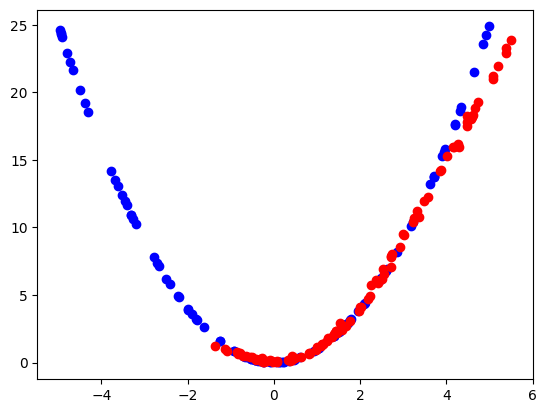

4500
2/2 [==============================] - 0s 5ms/step
4501
2/2 [==============================] - 0s 5ms/step
4502
2/2 [==============================] - 0s 6ms/step
4503
2/2 [==============================] - 0s 3ms/step
4504
2/2 [==============================] - 0s 5ms/step
4505
2/2 [==============================] - 0s 4ms/step
4506
2/2 [==============================] - 0s 4ms/step
4507
2/2 [==============================] - 0s 4ms/step
4508
2/2 [==============================] - 0s 4ms/step
4509
2/2 [==============================] - 0s 3ms/step
4510
2/2 [==============================] - 0s 3ms/step
4511
2/2 [==============================] - 0s 3ms/step
4512
2/2 [==============================] - 0s 4ms/step
4513
2/2 [==============================] - 0s 3ms/step
4514
2/2 [==============================] - 0s 6ms/step
4515
2/2 [==============================] - 0s 3ms/step
4516
2/2 [==============================] - 0s 5ms/step
4517
2/2 [==============================] - 0s 3

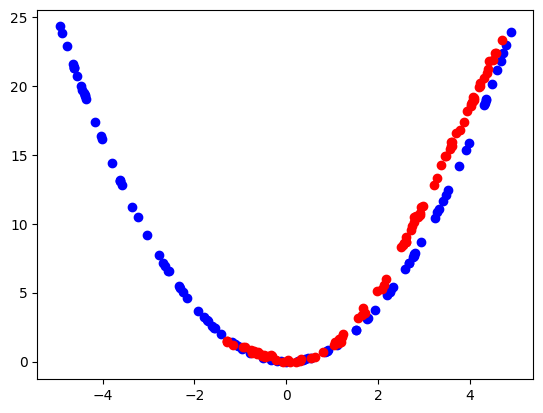

4600
2/2 [==============================] - 0s 4ms/step
4601
2/2 [==============================] - 0s 3ms/step
4602
2/2 [==============================] - 0s 3ms/step
4603
2/2 [==============================] - 0s 5ms/step
4604
2/2 [==============================] - 0s 4ms/step
4605
2/2 [==============================] - 0s 5ms/step
4606
2/2 [==============================] - 0s 3ms/step
4607
2/2 [==============================] - 0s 3ms/step
4608
2/2 [==============================] - 0s 4ms/step
4609
2/2 [==============================] - 0s 4ms/step
4610
2/2 [==============================] - 0s 3ms/step
4611
2/2 [==============================] - 0s 5ms/step
4612
2/2 [==============================] - 0s 5ms/step
4613
2/2 [==============================] - 0s 3ms/step
4614
2/2 [==============================] - 0s 4ms/step
4615
2/2 [==============================] - 0s 4ms/step
4616
2/2 [==============================] - 0s 3ms/step
4617
2/2 [==============================] - 0s 4

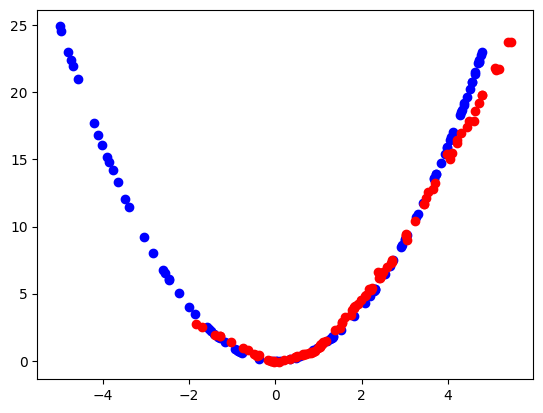

4700
2/2 [==============================] - 0s 5ms/step
4701
2/2 [==============================] - 0s 3ms/step
4702
2/2 [==============================] - 0s 3ms/step
4703
2/2 [==============================] - 0s 3ms/step
4704
2/2 [==============================] - 0s 4ms/step
4705
2/2 [==============================] - 0s 4ms/step
4706
2/2 [==============================] - 0s 3ms/step
4707
2/2 [==============================] - 0s 5ms/step
4708
2/2 [==============================] - 0s 3ms/step
4709
2/2 [==============================] - 0s 3ms/step
4710
2/2 [==============================] - 0s 3ms/step
4711
2/2 [==============================] - 0s 4ms/step
4712
2/2 [==============================] - 0s 5ms/step
4713
2/2 [==============================] - 0s 4ms/step
4714
2/2 [==============================] - 0s 4ms/step
4715
2/2 [==============================] - 0s 4ms/step
4716
2/2 [==============================] - 0s 4ms/step
4717
2/2 [==============================] - 0s 5

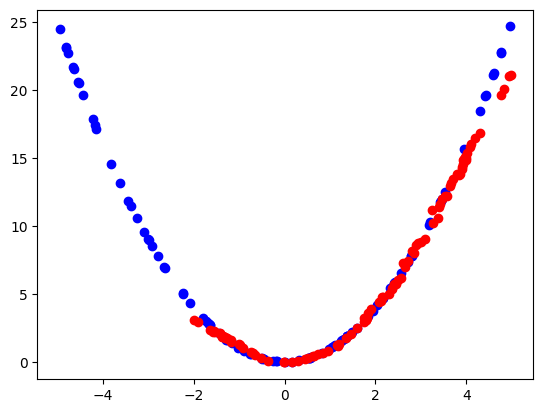

4800
2/2 [==============================] - 0s 4ms/step
4801
2/2 [==============================] - 0s 9ms/step
4802
2/2 [==============================] - 0s 4ms/step
4803
2/2 [==============================] - 0s 3ms/step
4804
2/2 [==============================] - 0s 4ms/step
4805
2/2 [==============================] - 0s 4ms/step
4806
2/2 [==============================] - 0s 4ms/step
4807
2/2 [==============================] - 0s 5ms/step
4808
2/2 [==============================] - 0s 3ms/step
4809
2/2 [==============================] - 0s 4ms/step
4810
2/2 [==============================] - 0s 4ms/step
4811
2/2 [==============================] - 0s 3ms/step
4812
2/2 [==============================] - 0s 4ms/step
4813
2/2 [==============================] - 0s 4ms/step
4814
2/2 [==============================] - 0s 4ms/step
4815
2/2 [==============================] - 0s 4ms/step
4816
2/2 [==============================] - 0s 4ms/step
4817
2/2 [==============================] - 0s 4

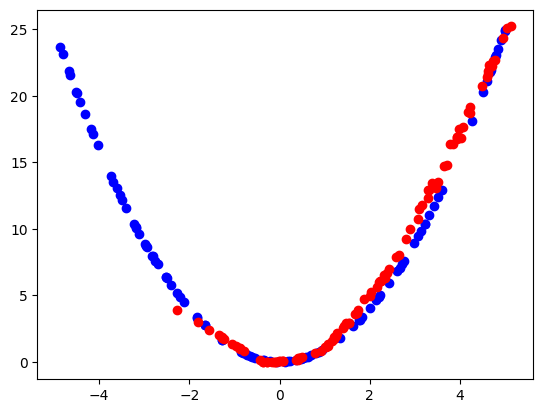

4900
2/2 [==============================] - 0s 3ms/step
4901
2/2 [==============================] - 0s 3ms/step
4902
2/2 [==============================] - 0s 3ms/step
4903
2/2 [==============================] - 0s 4ms/step
4904
2/2 [==============================] - 0s 4ms/step
4905
2/2 [==============================] - 0s 3ms/step
4906
2/2 [==============================] - 0s 5ms/step
4907
2/2 [==============================] - 0s 5ms/step
4908
2/2 [==============================] - 0s 4ms/step
4909
2/2 [==============================] - 0s 5ms/step
4910
2/2 [==============================] - 0s 4ms/step
4911
2/2 [==============================] - 0s 3ms/step
4912
2/2 [==============================] - 0s 3ms/step
4913
2/2 [==============================] - 0s 4ms/step
4914
2/2 [==============================] - 0s 4ms/step
4915
2/2 [==============================] - 0s 3ms/step
4916
2/2 [==============================] - 0s 6ms/step
4917
2/2 [==============================] - 0s 6

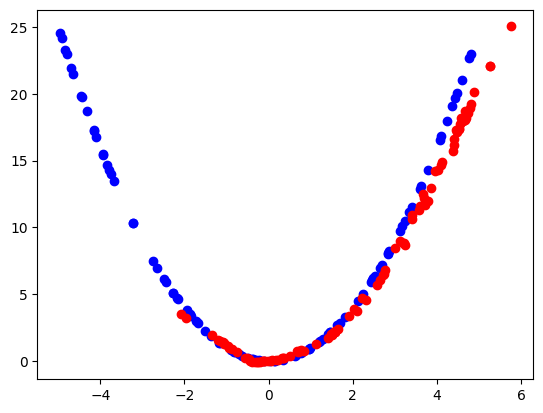

5000
2/2 [==============================] - 0s 3ms/step
5001
2/2 [==============================] - 0s 4ms/step
5002
2/2 [==============================] - 0s 5ms/step
5003
2/2 [==============================] - 0s 3ms/step
5004
2/2 [==============================] - 0s 7ms/step
5005
2/2 [==============================] - 0s 4ms/step
5006
2/2 [==============================] - 0s 4ms/step
5007
2/2 [==============================] - 0s 4ms/step
5008
2/2 [==============================] - 0s 4ms/step
5009
2/2 [==============================] - 0s 7ms/step
5010
2/2 [==============================] - 0s 4ms/step
5011
2/2 [==============================] - 0s 4ms/step
5012
2/2 [==============================] - 0s 3ms/step
5013
2/2 [==============================] - 0s 3ms/step
5014
2/2 [==============================] - 0s 6ms/step
5015
2/2 [==============================] - 0s 7ms/step
5016
2/2 [==============================] - 0s 5ms/step
5017
2/2 [==============================] - 0s 3

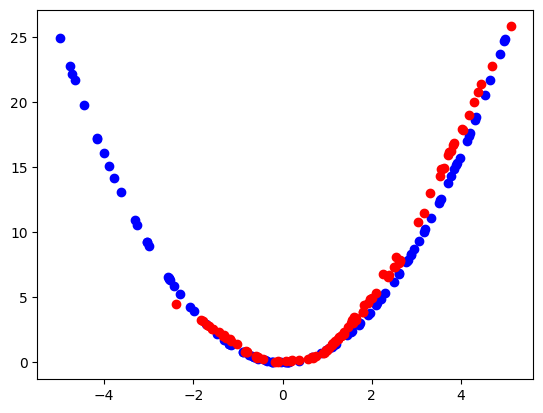

5100
2/2 [==============================] - 0s 6ms/step
5101
2/2 [==============================] - 0s 5ms/step
5102
2/2 [==============================] - 0s 6ms/step
5103
2/2 [==============================] - 0s 8ms/step
5104
2/2 [==============================] - 0s 4ms/step
5105
2/2 [==============================] - 0s 9ms/step
5106
2/2 [==============================] - 0s 6ms/step
5107
2/2 [==============================] - 0s 6ms/step
5108
2/2 [==============================] - 0s 4ms/step
5109
2/2 [==============================] - 0s 4ms/step
5110
2/2 [==============================] - 0s 6ms/step
5111
2/2 [==============================] - 0s 7ms/step
5112
2/2 [==============================] - 0s 4ms/step
5113
2/2 [==============================] - 0s 4ms/step
5114
2/2 [==============================] - 0s 5ms/step
5115
2/2 [==============================] - 0s 9ms/step
5116
2/2 [==============================] - 0s 7ms/step
5117
2/2 [==============================] - 0s 5

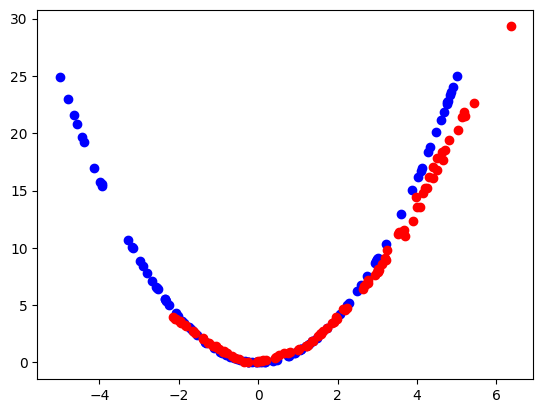

5200
2/2 [==============================] - 0s 4ms/step
5201
2/2 [==============================] - 0s 5ms/step
5202
2/2 [==============================] - 0s 7ms/step
5203
2/2 [==============================] - 0s 5ms/step
5204
2/2 [==============================] - 0s 3ms/step
5205
2/2 [==============================] - 0s 3ms/step
5206
2/2 [==============================] - 0s 4ms/step
5207
2/2 [==============================] - 0s 5ms/step
5208
2/2 [==============================] - 0s 5ms/step
5209
2/2 [==============================] - 0s 4ms/step
5210
2/2 [==============================] - 0s 5ms/step
5211
2/2 [==============================] - 0s 4ms/step
5212
2/2 [==============================] - 0s 4ms/step
5213
2/2 [==============================] - 0s 3ms/step
5214
2/2 [==============================] - 0s 3ms/step
5215
2/2 [==============================] - 0s 5ms/step
5216
2/2 [==============================] - 0s 8ms/step
5217
2/2 [==============================] - 0s 4

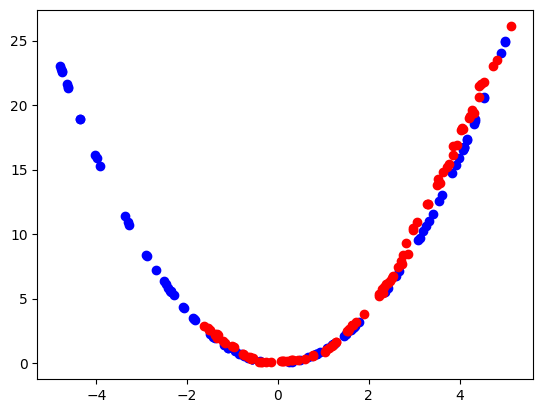

5300
2/2 [==============================] - 0s 4ms/step
5301
2/2 [==============================] - 0s 4ms/step
5302
2/2 [==============================] - 0s 3ms/step
5303
2/2 [==============================] - 0s 3ms/step
5304
2/2 [==============================] - 0s 5ms/step
5305
2/2 [==============================] - 0s 3ms/step
5306
2/2 [==============================] - 0s 3ms/step
5307
2/2 [==============================] - 0s 4ms/step
5308
2/2 [==============================] - 0s 4ms/step
5309
2/2 [==============================] - 0s 4ms/step
5310
2/2 [==============================] - 0s 5ms/step
5311
2/2 [==============================] - 0s 5ms/step
5312
2/2 [==============================] - 0s 4ms/step
5313
2/2 [==============================] - 0s 4ms/step
5314
2/2 [==============================] - 0s 4ms/step
5315
2/2 [==============================] - 0s 3ms/step
5316
2/2 [==============================] - 0s 4ms/step
5317
2/2 [==============================] - 0s 4

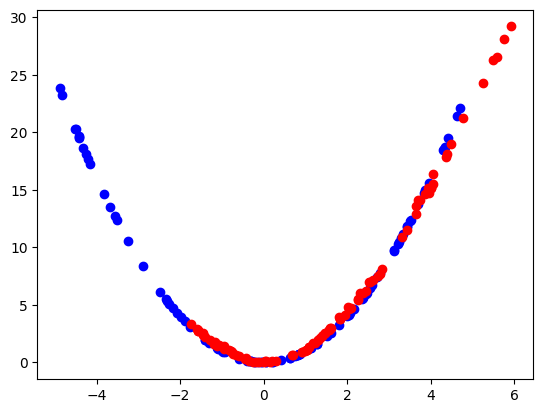

5400
2/2 [==============================] - 0s 4ms/step
5401
2/2 [==============================] - 0s 3ms/step
5402
2/2 [==============================] - 0s 4ms/step
5403
2/2 [==============================] - 0s 3ms/step
5404
2/2 [==============================] - 0s 6ms/step
5405
2/2 [==============================] - 0s 4ms/step
5406
2/2 [==============================] - 0s 4ms/step
5407
2/2 [==============================] - 0s 6ms/step
5408
2/2 [==============================] - 0s 3ms/step
5409
2/2 [==============================] - 0s 4ms/step
5410
2/2 [==============================] - 0s 4ms/step
5411
2/2 [==============================] - 0s 4ms/step
5412
2/2 [==============================] - 0s 4ms/step
5413
2/2 [==============================] - 0s 3ms/step
5414
2/2 [==============================] - 0s 3ms/step
5415
2/2 [==============================] - 0s 5ms/step
5416
2/2 [==============================] - 0s 4ms/step
5417
2/2 [==============================] - 0s 4

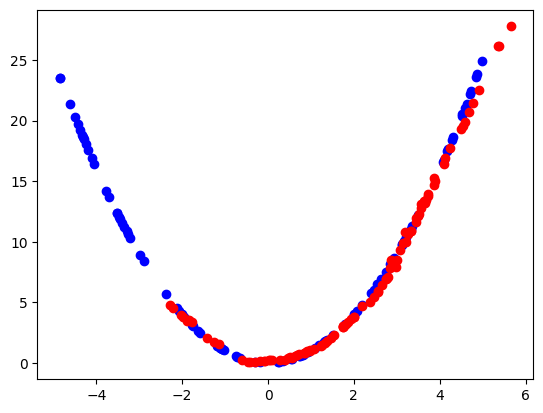

5500
2/2 [==============================] - 0s 4ms/step
5501
2/2 [==============================] - 0s 3ms/step
5502
2/2 [==============================] - 0s 3ms/step
5503
2/2 [==============================] - 0s 4ms/step
5504
2/2 [==============================] - 0s 5ms/step
5505
2/2 [==============================] - 0s 3ms/step
5506
2/2 [==============================] - 0s 5ms/step
5507
2/2 [==============================] - 0s 4ms/step
5508
2/2 [==============================] - 0s 4ms/step
5509
2/2 [==============================] - 0s 4ms/step
5510
2/2 [==============================] - 0s 4ms/step
5511
2/2 [==============================] - 0s 3ms/step
5512
2/2 [==============================] - 0s 5ms/step
5513
2/2 [==============================] - 0s 4ms/step
5514
2/2 [==============================] - 0s 4ms/step
5515
2/2 [==============================] - 0s 4ms/step
5516
2/2 [==============================] - 0s 3ms/step
5517
2/2 [==============================] - 0s 3

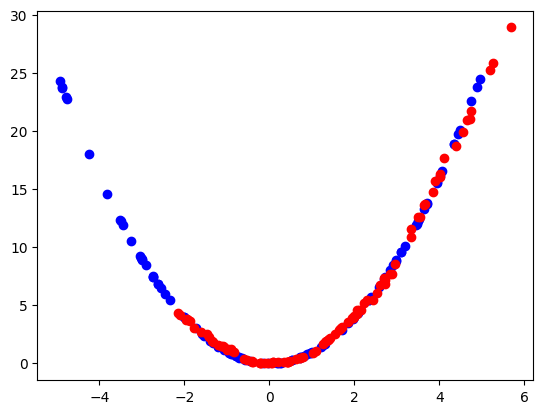

5600
2/2 [==============================] - 0s 4ms/step
5601
2/2 [==============================] - 0s 5ms/step
5602
2/2 [==============================] - 0s 7ms/step
5603
2/2 [==============================] - 0s 3ms/step
5604
2/2 [==============================] - 0s 5ms/step
5605
2/2 [==============================] - 0s 5ms/step
5606
2/2 [==============================] - 0s 3ms/step
5607
2/2 [==============================] - 0s 4ms/step
5608
2/2 [==============================] - 0s 3ms/step
5609
2/2 [==============================] - 0s 6ms/step
5610
2/2 [==============================] - 0s 4ms/step
5611
2/2 [==============================] - 0s 4ms/step
5612
2/2 [==============================] - 0s 3ms/step
5613
2/2 [==============================] - 0s 3ms/step
5614
2/2 [==============================] - 0s 4ms/step
5615
2/2 [==============================] - 0s 4ms/step
5616
2/2 [==============================] - 0s 3ms/step
5617
2/2 [==============================] - 0s 4

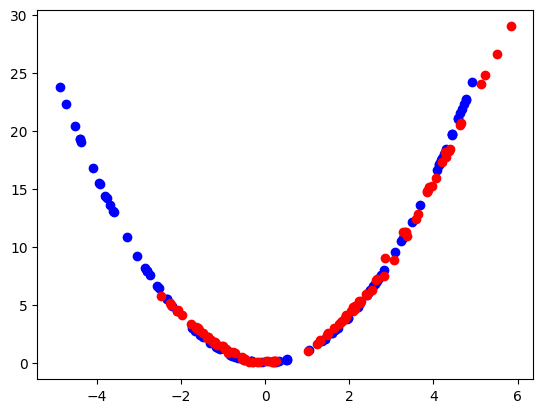

5700
2/2 [==============================] - 0s 3ms/step
5701
2/2 [==============================] - 0s 5ms/step
5702
2/2 [==============================] - 0s 5ms/step
5703
2/2 [==============================] - 0s 4ms/step
5704
2/2 [==============================] - 0s 4ms/step
5705
2/2 [==============================] - 0s 3ms/step
5706
2/2 [==============================] - 0s 4ms/step
5707
2/2 [==============================] - 0s 4ms/step
5708
2/2 [==============================] - 0s 4ms/step
5709
2/2 [==============================] - 0s 4ms/step
5710
2/2 [==============================] - 0s 3ms/step
5711
2/2 [==============================] - 0s 7ms/step
5712
2/2 [==============================] - 0s 6ms/step
5713
2/2 [==============================] - 0s 6ms/step
5714
2/2 [==============================] - 0s 3ms/step
5715
2/2 [==============================] - 0s 5ms/step
5716
2/2 [==============================] - 0s 4ms/step
5717
2/2 [==============================] - 0s 4

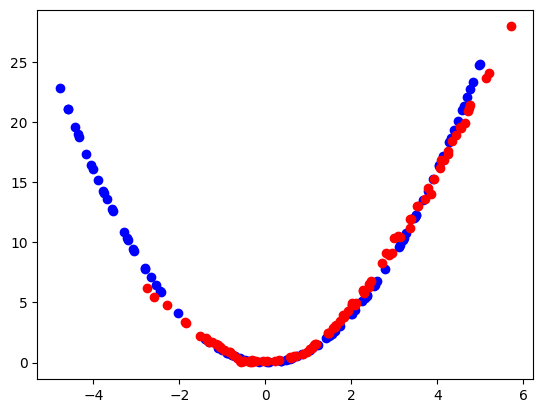

5800
2/2 [==============================] - 0s 3ms/step
5801
2/2 [==============================] - 0s 4ms/step
5802
2/2 [==============================] - 0s 3ms/step
5803
2/2 [==============================] - 0s 5ms/step
5804
2/2 [==============================] - 0s 3ms/step
5805
2/2 [==============================] - 0s 4ms/step
5806
2/2 [==============================] - 0s 5ms/step
5807
2/2 [==============================] - 0s 5ms/step
5808
2/2 [==============================] - 0s 4ms/step
5809
2/2 [==============================] - 0s 4ms/step
5810
2/2 [==============================] - 0s 4ms/step
5811
2/2 [==============================] - 0s 4ms/step
5812
2/2 [==============================] - 0s 5ms/step
5813
2/2 [==============================] - 0s 4ms/step
5814
2/2 [==============================] - 0s 5ms/step
5815
2/2 [==============================] - 0s 4ms/step
5816
2/2 [==============================] - 0s 4ms/step
5817
2/2 [==============================] - 0s 5

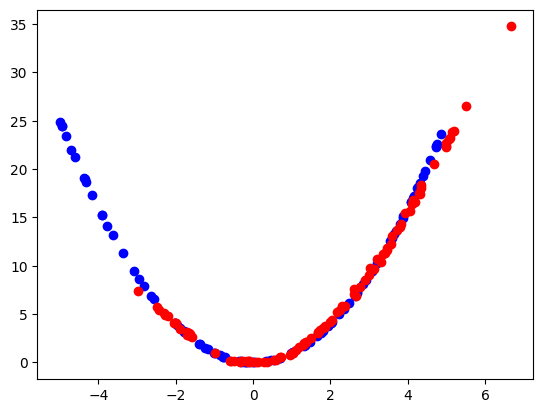

5900
2/2 [==============================] - 0s 3ms/step
5901
2/2 [==============================] - 0s 4ms/step
5902
2/2 [==============================] - 0s 3ms/step
5903
2/2 [==============================] - 0s 4ms/step
5904
2/2 [==============================] - 0s 4ms/step
5905
2/2 [==============================] - 0s 3ms/step
5906
2/2 [==============================] - 0s 4ms/step
5907
2/2 [==============================] - 0s 3ms/step
5908
2/2 [==============================] - 0s 3ms/step
5909
2/2 [==============================] - 0s 4ms/step
5910
2/2 [==============================] - 0s 4ms/step
5911
2/2 [==============================] - 0s 4ms/step
5912
2/2 [==============================] - 0s 3ms/step
5913
2/2 [==============================] - 0s 3ms/step
5914
2/2 [==============================] - 0s 4ms/step
5915
2/2 [==============================] - 0s 4ms/step
5916
2/2 [==============================] - 0s 5ms/step
5917
2/2 [==============================] - 0s 4

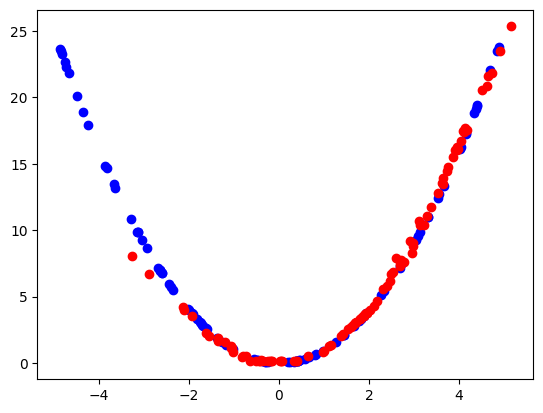

6000
2/2 [==============================] - 0s 3ms/step
6001
2/2 [==============================] - 0s 5ms/step
6002
2/2 [==============================] - 0s 6ms/step
6003
2/2 [==============================] - 0s 4ms/step
6004
2/2 [==============================] - 0s 4ms/step
6005
2/2 [==============================] - 0s 4ms/step
6006
2/2 [==============================] - 0s 4ms/step
6007
2/2 [==============================] - 0s 4ms/step
6008
2/2 [==============================] - 0s 3ms/step
6009
2/2 [==============================] - 0s 5ms/step
6010
2/2 [==============================] - 0s 4ms/step
6011
2/2 [==============================] - 0s 6ms/step
6012
2/2 [==============================] - 0s 4ms/step
6013
2/2 [==============================] - 0s 3ms/step
6014
2/2 [==============================] - 0s 3ms/step
6015
2/2 [==============================] - 0s 4ms/step
6016
2/2 [==============================] - 0s 5ms/step
6017
2/2 [==============================] - 0s 4

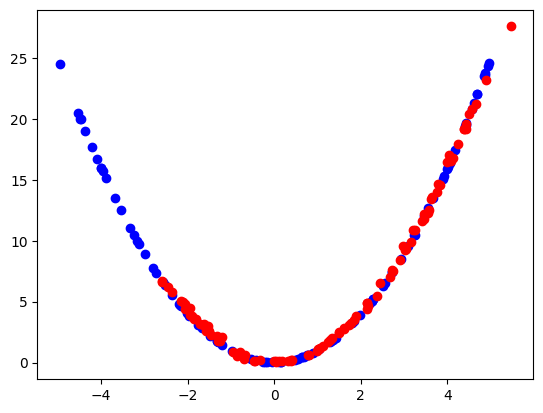

6100
2/2 [==============================] - 0s 3ms/step
6101
2/2 [==============================] - 0s 4ms/step
6102
2/2 [==============================] - 0s 3ms/step
6103
2/2 [==============================] - 0s 6ms/step
6104
2/2 [==============================] - 0s 11ms/step
6105
2/2 [==============================] - 0s 4ms/step
6106
2/2 [==============================] - 0s 6ms/step
6107
2/2 [==============================] - 0s 4ms/step
6108
2/2 [==============================] - 0s 4ms/step
6109
2/2 [==============================] - 0s 4ms/step
6110
2/2 [==============================] - 0s 5ms/step
6111
2/2 [==============================] - 0s 4ms/step
6112
2/2 [==============================] - 0s 4ms/step
6113
2/2 [==============================] - 0s 3ms/step
6114
2/2 [==============================] - 0s 3ms/step
6115
2/2 [==============================] - 0s 3ms/step
6116
2/2 [==============================] - 0s 4ms/step
6117
2/2 [==============================] - 0s 

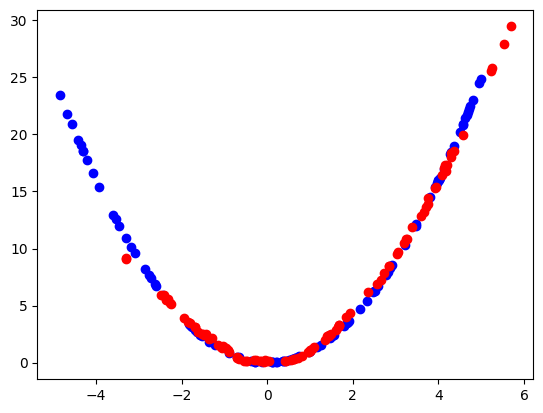

6200
2/2 [==============================] - 0s 4ms/step
6201
2/2 [==============================] - 0s 8ms/step
6202
2/2 [==============================] - 0s 3ms/step
6203
2/2 [==============================] - 0s 4ms/step
6204
2/2 [==============================] - 0s 3ms/step
6205
2/2 [==============================] - 0s 7ms/step
6206
2/2 [==============================] - 0s 5ms/step
6207
2/2 [==============================] - 0s 3ms/step
6208
2/2 [==============================] - 0s 4ms/step
6209
2/2 [==============================] - 0s 12ms/step
6210
2/2 [==============================] - 0s 7ms/step
6211
2/2 [==============================] - 0s 5ms/step
6212
2/2 [==============================] - 0s 3ms/step
6213
2/2 [==============================] - 0s 4ms/step
6214
2/2 [==============================] - 0s 4ms/step
6215
2/2 [==============================] - 0s 4ms/step
6216
2/2 [==============================] - 0s 3ms/step
6217
2/2 [==============================] - 0s 

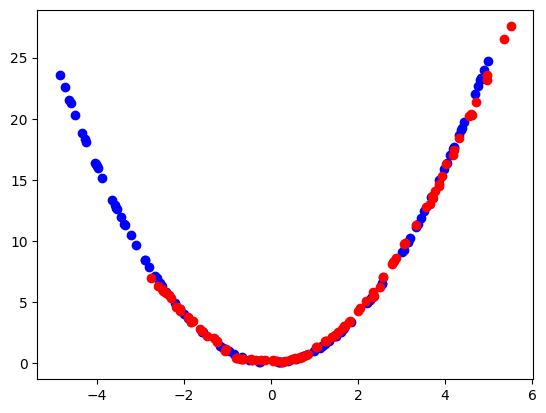

6300
2/2 [==============================] - 0s 7ms/step
6301
2/2 [==============================] - 0s 6ms/step
6302
2/2 [==============================] - 0s 6ms/step
6303
2/2 [==============================] - 0s 7ms/step
6304
2/2 [==============================] - 0s 6ms/step
6305
2/2 [==============================] - 0s 4ms/step
6306
2/2 [==============================] - 0s 4ms/step
6307
2/2 [==============================] - 0s 3ms/step
6308
2/2 [==============================] - 0s 6ms/step
6309
2/2 [==============================] - 0s 4ms/step
6310
2/2 [==============================] - 0s 5ms/step
6311
2/2 [==============================] - 0s 4ms/step
6312
2/2 [==============================] - 0s 4ms/step
6313
2/2 [==============================] - 0s 3ms/step
6314
2/2 [==============================] - 0s 3ms/step
6315
2/2 [==============================] - 0s 4ms/step
6316
2/2 [==============================] - 0s 3ms/step
6317
2/2 [==============================] - 0s 6

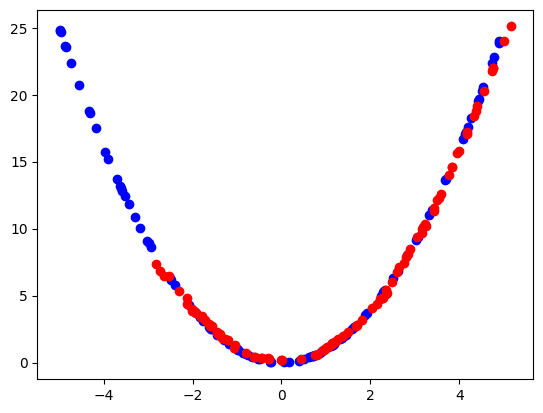

6400
2/2 [==============================] - 0s 14ms/step
6401
2/2 [==============================] - 0s 3ms/step
6402
2/2 [==============================] - 0s 6ms/step
6403
2/2 [==============================] - 0s 4ms/step
6404
2/2 [==============================] - 0s 4ms/step
6405
2/2 [==============================] - 0s 4ms/step
6406
2/2 [==============================] - 0s 6ms/step
6407
2/2 [==============================] - 0s 4ms/step
6408
2/2 [==============================] - 0s 4ms/step
6409
2/2 [==============================] - 0s 6ms/step
6410
2/2 [==============================] - 0s 3ms/step
6411
2/2 [==============================] - 0s 3ms/step
6412
2/2 [==============================] - 0s 5ms/step
6413
2/2 [==============================] - 0s 5ms/step
6414
2/2 [==============================] - 0s 6ms/step
6415
2/2 [==============================] - 0s 5ms/step
6416
2/2 [==============================] - 0s 3ms/step
6417
2/2 [==============================] - 0s 

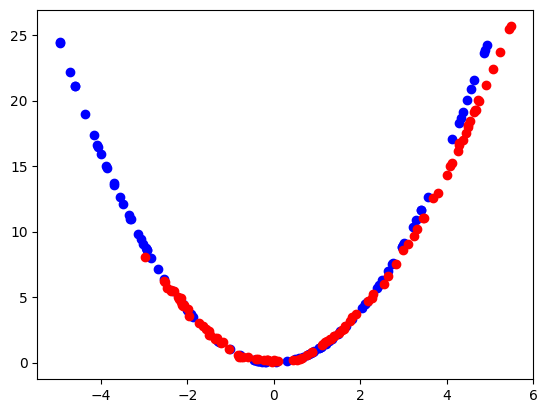

6500
2/2 [==============================] - 0s 4ms/step
6501
2/2 [==============================] - 0s 5ms/step
6502
2/2 [==============================] - 0s 7ms/step
6503
2/2 [==============================] - 0s 6ms/step
6504
2/2 [==============================] - 0s 3ms/step
6505
2/2 [==============================] - 0s 4ms/step
6506
2/2 [==============================] - 0s 3ms/step
6507
2/2 [==============================] - 0s 4ms/step
6508
2/2 [==============================] - 0s 4ms/step
6509
2/2 [==============================] - 0s 4ms/step
6510
2/2 [==============================] - 0s 4ms/step
6511
2/2 [==============================] - 0s 4ms/step
6512
2/2 [==============================] - 0s 5ms/step
6513
2/2 [==============================] - 0s 6ms/step
6514
2/2 [==============================] - 0s 3ms/step
6515
2/2 [==============================] - 0s 3ms/step
6516
2/2 [==============================] - 0s 4ms/step
6517
2/2 [==============================] - 0s 3

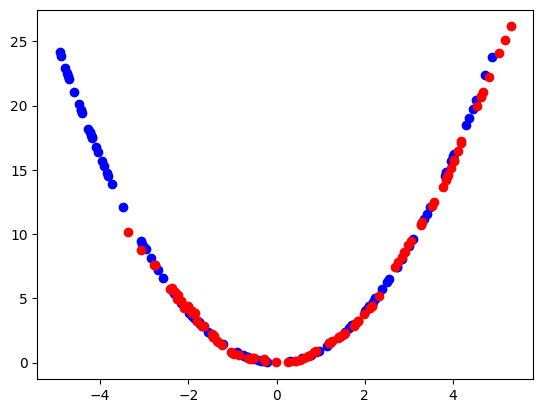

6600
2/2 [==============================] - 0s 4ms/step
6601
2/2 [==============================] - 0s 5ms/step
6602
2/2 [==============================] - 0s 4ms/step
6603
2/2 [==============================] - 0s 6ms/step
6604
2/2 [==============================] - 0s 7ms/step
6605
2/2 [==============================] - 0s 4ms/step
6606
2/2 [==============================] - 0s 3ms/step
6607
2/2 [==============================] - 0s 4ms/step
6608
2/2 [==============================] - 0s 7ms/step
6609
2/2 [==============================] - 0s 3ms/step
6610
2/2 [==============================] - 0s 4ms/step
6611
2/2 [==============================] - 0s 4ms/step
6612
2/2 [==============================] - 0s 4ms/step
6613
2/2 [==============================] - 0s 4ms/step
6614
2/2 [==============================] - 0s 4ms/step
6615
2/2 [==============================] - 0s 4ms/step
6616
2/2 [==============================] - 0s 4ms/step
6617
2/2 [==============================] - 0s 5

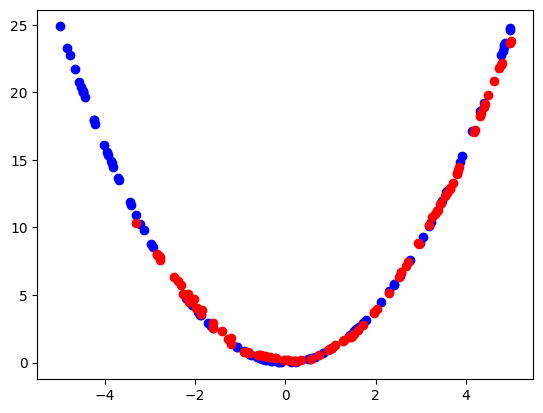

6700
2/2 [==============================] - 0s 4ms/step
6701
2/2 [==============================] - 0s 3ms/step
6702
2/2 [==============================] - 0s 7ms/step
6703
2/2 [==============================] - 0s 5ms/step
6704
2/2 [==============================] - 0s 4ms/step
6705
2/2 [==============================] - 0s 5ms/step
6706
2/2 [==============================] - 0s 4ms/step
6707
2/2 [==============================] - 0s 4ms/step
6708
2/2 [==============================] - 0s 4ms/step
6709
2/2 [==============================] - 0s 3ms/step
6710
2/2 [==============================] - 0s 5ms/step
6711
2/2 [==============================] - 0s 3ms/step
6712
2/2 [==============================] - 0s 4ms/step
6713
2/2 [==============================] - 0s 4ms/step
6714
2/2 [==============================] - 0s 5ms/step
6715
2/2 [==============================] - 0s 5ms/step
6716
2/2 [==============================] - 0s 4ms/step
6717
2/2 [==============================] - 0s 4

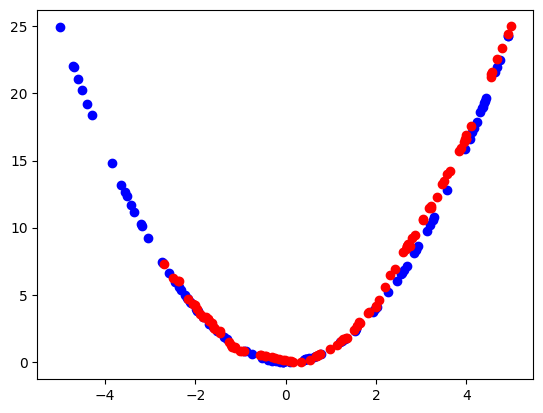

6800
2/2 [==============================] - 0s 8ms/step
6801
2/2 [==============================] - 0s 6ms/step
6802
2/2 [==============================] - 0s 3ms/step
6803
2/2 [==============================] - 0s 5ms/step
6804
2/2 [==============================] - 0s 3ms/step
6805
2/2 [==============================] - 0s 4ms/step
6806
2/2 [==============================] - 0s 3ms/step
6807
2/2 [==============================] - 0s 4ms/step
6808
2/2 [==============================] - 0s 4ms/step
6809
2/2 [==============================] - 0s 4ms/step
6810
2/2 [==============================] - 0s 3ms/step
6811
2/2 [==============================] - 0s 6ms/step
6812
2/2 [==============================] - 0s 5ms/step
6813
2/2 [==============================] - 0s 5ms/step
6814
2/2 [==============================] - 0s 3ms/step
6815
2/2 [==============================] - 0s 4ms/step
6816
2/2 [==============================] - 0s 6ms/step
6817
2/2 [==============================] - 0s 4

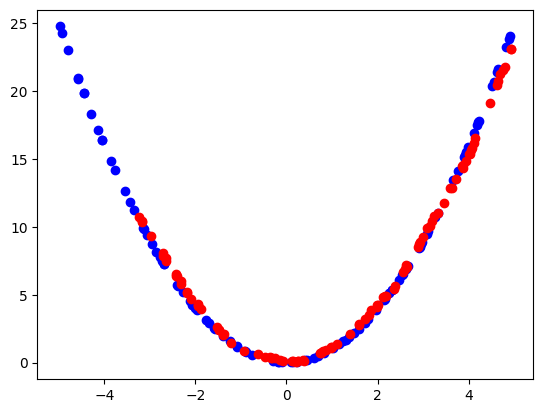

6900
2/2 [==============================] - 0s 4ms/step
6901
2/2 [==============================] - 0s 5ms/step
6902
2/2 [==============================] - 0s 4ms/step
6903
2/2 [==============================] - 0s 4ms/step
6904
2/2 [==============================] - 0s 4ms/step
6905
2/2 [==============================] - 0s 5ms/step
6906
2/2 [==============================] - 0s 4ms/step
6907
2/2 [==============================] - 0s 3ms/step
6908
2/2 [==============================] - 0s 4ms/step
6909
2/2 [==============================] - 0s 3ms/step
6910
2/2 [==============================] - 0s 4ms/step
6911
2/2 [==============================] - 0s 4ms/step
6912
2/2 [==============================] - 0s 4ms/step
6913
2/2 [==============================] - 0s 4ms/step
6914
2/2 [==============================] - 0s 3ms/step
6915
2/2 [==============================] - 0s 5ms/step
6916
2/2 [==============================] - 0s 4ms/step
6917
2/2 [==============================] - 0s 4

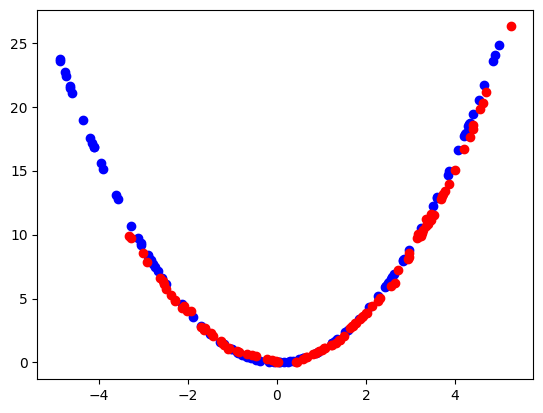

7000
2/2 [==============================] - 0s 3ms/step
7001
2/2 [==============================] - 0s 4ms/step
7002
2/2 [==============================] - 0s 4ms/step
7003
2/2 [==============================] - 0s 4ms/step
7004
2/2 [==============================] - 0s 6ms/step
7005
2/2 [==============================] - 0s 5ms/step
7006
2/2 [==============================] - 0s 7ms/step
7007
2/2 [==============================] - 0s 4ms/step
7008
2/2 [==============================] - 0s 4ms/step
7009
2/2 [==============================] - 0s 4ms/step
7010
2/2 [==============================] - 0s 3ms/step
7011
2/2 [==============================] - 0s 4ms/step
7012
2/2 [==============================] - 0s 5ms/step
7013
2/2 [==============================] - 0s 9ms/step
7014
2/2 [==============================] - 0s 4ms/step
7015
2/2 [==============================] - 0s 10ms/step
7016
2/2 [==============================] - 0s 5ms/step
7017
2/2 [==============================] - 0s 

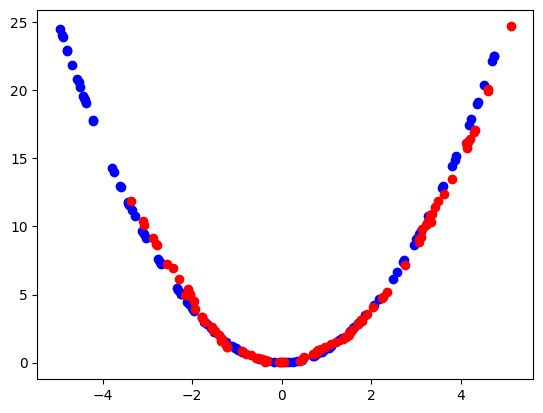

7100
2/2 [==============================] - 0s 3ms/step
7101
2/2 [==============================] - 0s 3ms/step
7102
2/2 [==============================] - 0s 5ms/step
7103
2/2 [==============================] - 0s 4ms/step
7104
2/2 [==============================] - 0s 7ms/step
7105
2/2 [==============================] - 0s 4ms/step
7106
2/2 [==============================] - 0s 3ms/step
7107
2/2 [==============================] - 0s 3ms/step
7108
2/2 [==============================] - 0s 4ms/step
7109
2/2 [==============================] - 0s 4ms/step
7110
2/2 [==============================] - 0s 3ms/step
7111
2/2 [==============================] - 0s 8ms/step
7112
2/2 [==============================] - 0s 4ms/step
7113
2/2 [==============================] - 0s 3ms/step
7114
2/2 [==============================] - 0s 4ms/step
7115
2/2 [==============================] - 0s 5ms/step
7116
2/2 [==============================] - 0s 5ms/step
7117
2/2 [==============================] - 0s 3

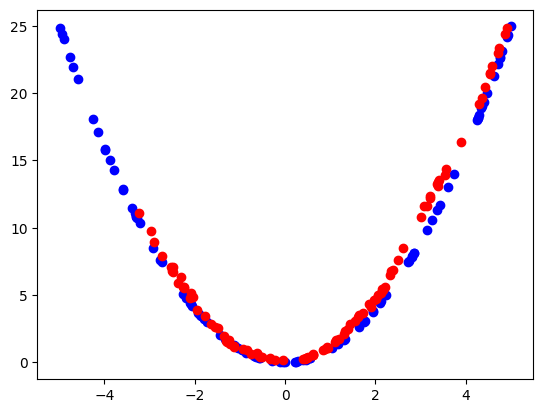

7200
2/2 [==============================] - 0s 6ms/step
7201
2/2 [==============================] - 0s 4ms/step
7202
2/2 [==============================] - 0s 4ms/step
7203
2/2 [==============================] - 0s 3ms/step
7204
2/2 [==============================] - 0s 5ms/step
7205
2/2 [==============================] - 0s 3ms/step
7206
2/2 [==============================] - 0s 3ms/step
7207
2/2 [==============================] - 0s 4ms/step
7208
2/2 [==============================] - 0s 4ms/step
7209
2/2 [==============================] - 0s 5ms/step
7210
2/2 [==============================] - 0s 4ms/step
7211
2/2 [==============================] - 0s 4ms/step
7212
2/2 [==============================] - 0s 3ms/step
7213
2/2 [==============================] - 0s 4ms/step
7214
2/2 [==============================] - 0s 3ms/step
7215
2/2 [==============================] - 0s 6ms/step
7216
2/2 [==============================] - 0s 4ms/step
7217
2/2 [==============================] - 0s 5

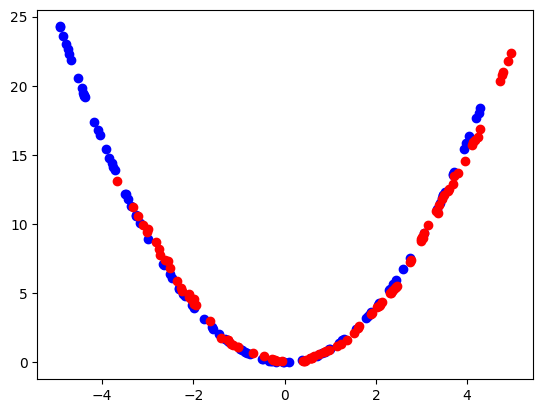

7300
2/2 [==============================] - 0s 3ms/step
7301
2/2 [==============================] - 0s 4ms/step
7302
2/2 [==============================] - 0s 5ms/step
7303
2/2 [==============================] - 0s 4ms/step
7304
2/2 [==============================] - 0s 5ms/step
7305
2/2 [==============================] - 0s 4ms/step
7306
2/2 [==============================] - 0s 3ms/step
7307
2/2 [==============================] - 0s 6ms/step
7308
2/2 [==============================] - 0s 3ms/step
7309
2/2 [==============================] - 0s 3ms/step
7310
2/2 [==============================] - 0s 6ms/step
7311
2/2 [==============================] - 0s 4ms/step
7312
2/2 [==============================] - 0s 4ms/step
7313
2/2 [==============================] - 0s 4ms/step
7314
2/2 [==============================] - 0s 6ms/step
7315
2/2 [==============================] - 0s 4ms/step
7316
2/2 [==============================] - 0s 5ms/step
7317
2/2 [==============================] - 0s 4

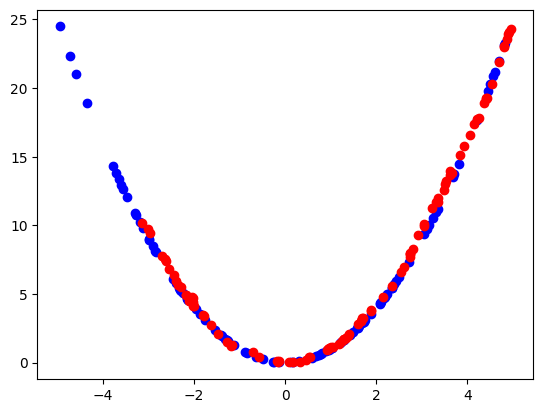

7400
2/2 [==============================] - 0s 4ms/step
7401
2/2 [==============================] - 0s 5ms/step
7402
2/2 [==============================] - 0s 5ms/step
7403
2/2 [==============================] - 0s 3ms/step
7404
2/2 [==============================] - 0s 3ms/step
7405
2/2 [==============================] - 0s 4ms/step
7406
2/2 [==============================] - 0s 3ms/step
7407
2/2 [==============================] - 0s 5ms/step
7408
2/2 [==============================] - 0s 3ms/step
7409
2/2 [==============================] - 0s 4ms/step
7410
2/2 [==============================] - 0s 3ms/step
7411
2/2 [==============================] - 0s 4ms/step
7412
2/2 [==============================] - 0s 4ms/step
7413
2/2 [==============================] - 0s 6ms/step
7414
2/2 [==============================] - 0s 4ms/step
7415
2/2 [==============================] - 0s 4ms/step
7416
2/2 [==============================] - 0s 3ms/step
7417
2/2 [==============================] - 0s 3

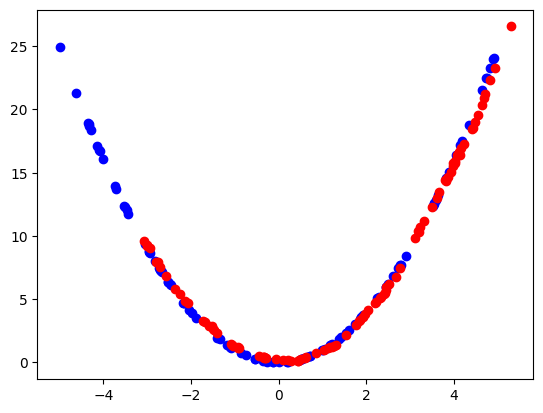

7500
2/2 [==============================] - 0s 4ms/step
7501
2/2 [==============================] - 0s 4ms/step
7502
2/2 [==============================] - 0s 3ms/step
7503
2/2 [==============================] - 0s 3ms/step
7504
2/2 [==============================] - 0s 4ms/step
7505
2/2 [==============================] - 0s 4ms/step
7506
2/2 [==============================] - 0s 4ms/step
7507
2/2 [==============================] - 0s 5ms/step
7508
2/2 [==============================] - 0s 3ms/step
7509
2/2 [==============================] - 0s 6ms/step
7510
2/2 [==============================] - 0s 3ms/step
7511
2/2 [==============================] - 0s 4ms/step
7512
2/2 [==============================] - 0s 4ms/step
7513
2/2 [==============================] - 0s 3ms/step
7514
2/2 [==============================] - 0s 4ms/step
7515
2/2 [==============================] - 0s 4ms/step
7516
2/2 [==============================] - 0s 5ms/step
7517
2/2 [==============================] - 0s 3

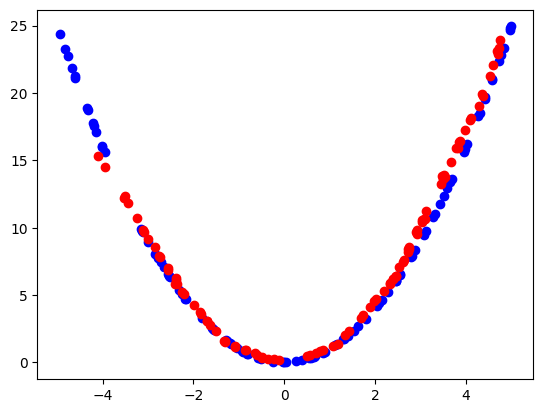

7600
2/2 [==============================] - 0s 4ms/step
7601
2/2 [==============================] - 0s 4ms/step
7602
2/2 [==============================] - 0s 5ms/step
7603
2/2 [==============================] - 0s 3ms/step
7604
2/2 [==============================] - 0s 3ms/step
7605
2/2 [==============================] - 0s 3ms/step
7606
2/2 [==============================] - 0s 5ms/step
7607
2/2 [==============================] - 0s 4ms/step
7608
2/2 [==============================] - 0s 4ms/step
7609
2/2 [==============================] - 0s 4ms/step
7610
2/2 [==============================] - 0s 4ms/step
7611
2/2 [==============================] - 0s 5ms/step
7612
2/2 [==============================] - 0s 4ms/step
7613
2/2 [==============================] - 0s 3ms/step
7614
2/2 [==============================] - 0s 4ms/step
7615
2/2 [==============================] - 0s 4ms/step
7616
2/2 [==============================] - 0s 4ms/step
7617
2/2 [==============================] - 0s 4

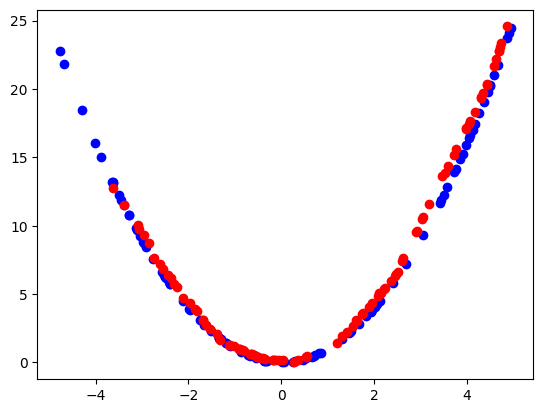

7700
2/2 [==============================] - 0s 3ms/step
7701
2/2 [==============================] - 0s 4ms/step
7702
2/2 [==============================] - 0s 3ms/step
7703
2/2 [==============================] - 0s 5ms/step
7704
2/2 [==============================] - 0s 3ms/step
7705
2/2 [==============================] - 0s 4ms/step
7706
2/2 [==============================] - 0s 4ms/step
7707
2/2 [==============================] - 0s 5ms/step
7708
2/2 [==============================] - 0s 4ms/step
7709
2/2 [==============================] - 0s 4ms/step
7710
2/2 [==============================] - 0s 4ms/step
7711
2/2 [==============================] - 0s 3ms/step
7712
2/2 [==============================] - 0s 3ms/step
7713
2/2 [==============================] - 0s 3ms/step
7714
2/2 [==============================] - 0s 5ms/step
7715
2/2 [==============================] - 0s 3ms/step
7716
2/2 [==============================] - 0s 4ms/step
7717
2/2 [==============================] - 0s 3

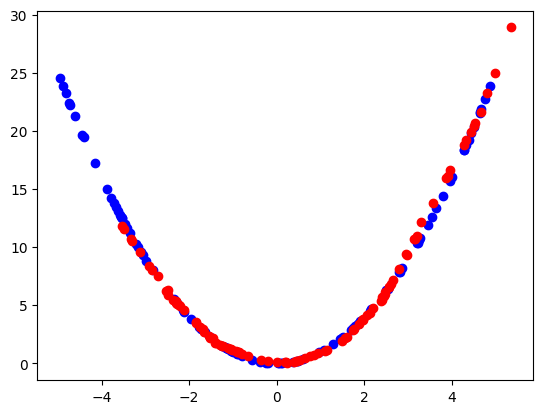

7800
2/2 [==============================] - 0s 4ms/step
7801
2/2 [==============================] - 0s 4ms/step
7802
2/2 [==============================] - 0s 6ms/step
7803
2/2 [==============================] - 0s 3ms/step
7804
2/2 [==============================] - 0s 3ms/step
7805
2/2 [==============================] - 0s 3ms/step
7806
2/2 [==============================] - 0s 4ms/step
7807
2/2 [==============================] - 0s 5ms/step
7808
2/2 [==============================] - 0s 4ms/step
7809
2/2 [==============================] - 0s 5ms/step
7810
2/2 [==============================] - 0s 4ms/step
7811
2/2 [==============================] - 0s 4ms/step
7812
2/2 [==============================] - 0s 4ms/step
7813
2/2 [==============================] - 0s 4ms/step
7814
2/2 [==============================] - 0s 5ms/step
7815
2/2 [==============================] - 0s 3ms/step
7816
2/2 [==============================] - 0s 4ms/step
7817
2/2 [==============================] - 0s 5

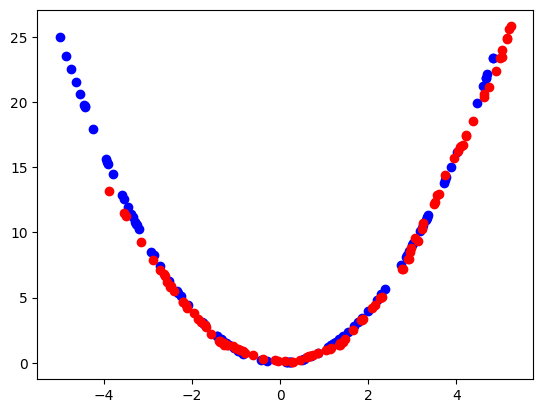

7900
2/2 [==============================] - 0s 3ms/step
7901
2/2 [==============================] - 0s 4ms/step
7902
2/2 [==============================] - 0s 4ms/step
7903
2/2 [==============================] - 0s 4ms/step
7904
2/2 [==============================] - 0s 5ms/step
7905
2/2 [==============================] - 0s 3ms/step
7906
2/2 [==============================] - 0s 6ms/step
7907
2/2 [==============================] - 0s 4ms/step
7908
2/2 [==============================] - 0s 4ms/step
7909
2/2 [==============================] - 0s 8ms/step
7910
2/2 [==============================] - 0s 4ms/step
7911
2/2 [==============================] - 0s 6ms/step
7912
2/2 [==============================] - 0s 4ms/step
7913
2/2 [==============================] - 0s 3ms/step
7914
2/2 [==============================] - 0s 4ms/step
7915
2/2 [==============================] - 0s 3ms/step
7916
2/2 [==============================] - 0s 3ms/step
7917
2/2 [==============================] - 0s 4

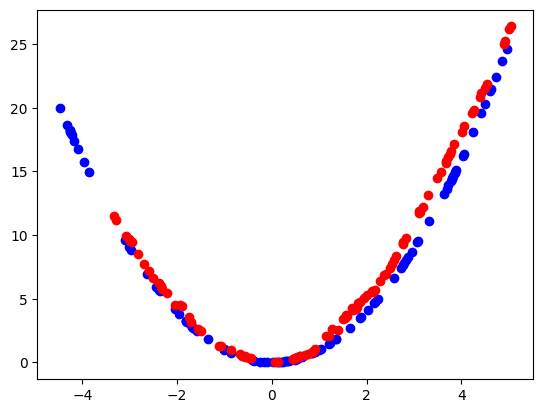

8000
2/2 [==============================] - 0s 3ms/step
8001
2/2 [==============================] - 0s 3ms/step
8002
2/2 [==============================] - 0s 3ms/step
8003
2/2 [==============================] - 0s 3ms/step
8004
2/2 [==============================] - 0s 3ms/step
8005
2/2 [==============================] - 0s 3ms/step
8006
2/2 [==============================] - 0s 4ms/step
8007
2/2 [==============================] - 0s 3ms/step
8008
2/2 [==============================] - 0s 4ms/step
8009
2/2 [==============================] - 0s 4ms/step
8010
2/2 [==============================] - 0s 3ms/step
8011
2/2 [==============================] - 0s 3ms/step
8012
2/2 [==============================] - 0s 4ms/step
8013
2/2 [==============================] - 0s 4ms/step
8014
2/2 [==============================] - 0s 4ms/step
8015
2/2 [==============================] - 0s 4ms/step
8016
2/2 [==============================] - 0s 4ms/step
8017
2/2 [==============================] - 0s 4

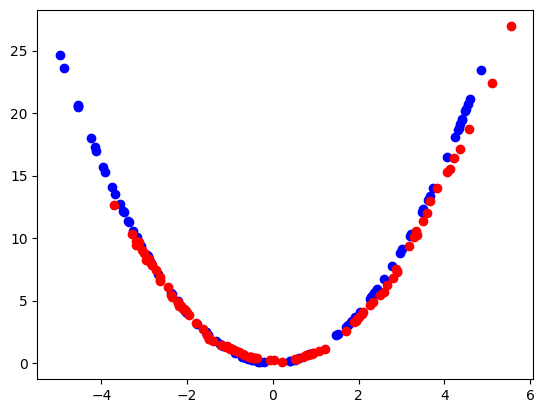

8100
2/2 [==============================] - 0s 4ms/step
8101
2/2 [==============================] - 0s 12ms/step
8102
2/2 [==============================] - 0s 5ms/step
8103
2/2 [==============================] - 0s 3ms/step
8104
2/2 [==============================] - 0s 4ms/step
8105
2/2 [==============================] - 0s 3ms/step
8106
2/2 [==============================] - 0s 3ms/step
8107
2/2 [==============================] - 0s 4ms/step
8108
2/2 [==============================] - 0s 4ms/step
8109
2/2 [==============================] - 0s 4ms/step
8110
2/2 [==============================] - 0s 5ms/step
8111
2/2 [==============================] - 0s 3ms/step
8112
2/2 [==============================] - 0s 4ms/step
8113
2/2 [==============================] - 0s 4ms/step
8114
2/2 [==============================] - 0s 4ms/step
8115
2/2 [==============================] - 0s 7ms/step
8116
2/2 [==============================] - 0s 5ms/step
8117
2/2 [==============================] - 0s 

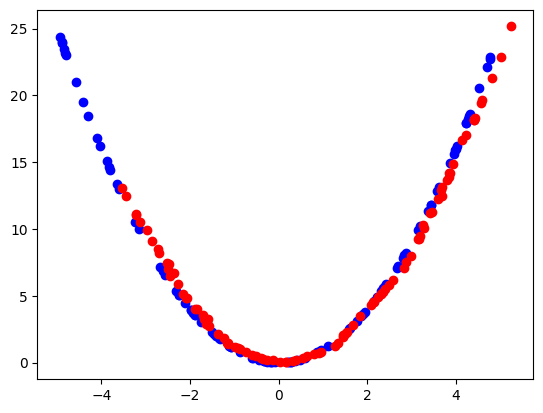

8200
2/2 [==============================] - 0s 5ms/step
8201
2/2 [==============================] - 0s 3ms/step
8202
2/2 [==============================] - 0s 3ms/step
8203
2/2 [==============================] - 0s 4ms/step
8204
2/2 [==============================] - 0s 5ms/step
8205
2/2 [==============================] - 0s 6ms/step
8206
2/2 [==============================] - 0s 5ms/step
8207
2/2 [==============================] - 0s 4ms/step
8208
2/2 [==============================] - 0s 11ms/step
8209
2/2 [==============================] - 0s 3ms/step
8210
2/2 [==============================] - 0s 3ms/step
8211
2/2 [==============================] - 0s 3ms/step
8212
2/2 [==============================] - 0s 4ms/step
8213
2/2 [==============================] - 0s 3ms/step
8214
2/2 [==============================] - 0s 4ms/step
8215
2/2 [==============================] - 0s 3ms/step
8216
2/2 [==============================] - 0s 5ms/step
8217
2/2 [==============================] - 0s 

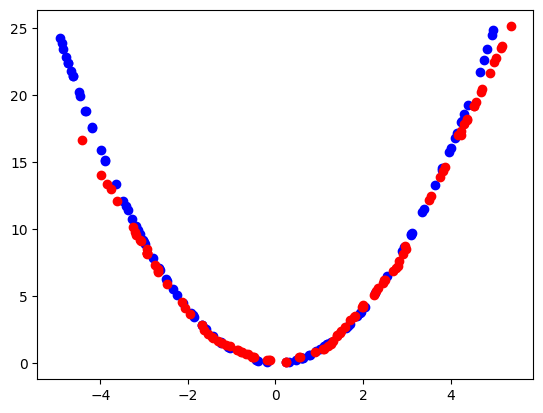

8300
2/2 [==============================] - 0s 5ms/step
8301
2/2 [==============================] - 0s 3ms/step
8302
2/2 [==============================] - 0s 4ms/step
8303
2/2 [==============================] - 0s 4ms/step
8304
2/2 [==============================] - 0s 5ms/step
8305
2/2 [==============================] - 0s 4ms/step
8306
2/2 [==============================] - 0s 3ms/step
8307
2/2 [==============================] - 0s 5ms/step
8308
2/2 [==============================] - 0s 4ms/step
8309
2/2 [==============================] - 0s 5ms/step
8310
2/2 [==============================] - 0s 7ms/step
8311
2/2 [==============================] - 0s 7ms/step
8312
2/2 [==============================] - 0s 4ms/step
8313
2/2 [==============================] - 0s 4ms/step
8314
2/2 [==============================] - 0s 6ms/step
8315
2/2 [==============================] - 0s 3ms/step
8316
2/2 [==============================] - 0s 6ms/step
8317
2/2 [==============================] - 0s 5

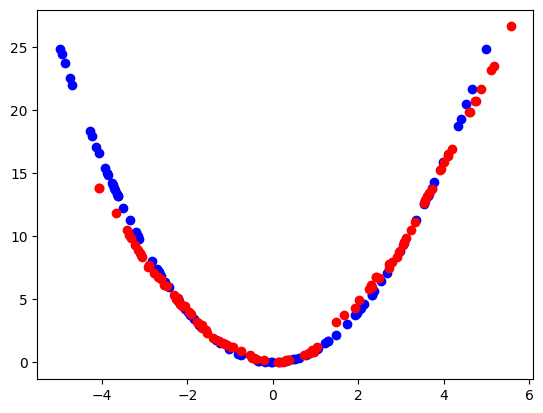

8400
2/2 [==============================] - 0s 7ms/step
8401
2/2 [==============================] - 0s 6ms/step
8402
2/2 [==============================] - 0s 4ms/step
8403
2/2 [==============================] - 0s 5ms/step
8404
2/2 [==============================] - 0s 6ms/step
8405
2/2 [==============================] - 0s 4ms/step
8406
2/2 [==============================] - 0s 3ms/step
8407
2/2 [==============================] - 0s 4ms/step
8408
2/2 [==============================] - 0s 3ms/step
8409
2/2 [==============================] - 0s 3ms/step
8410
2/2 [==============================] - 0s 4ms/step
8411
2/2 [==============================] - 0s 4ms/step
8412
2/2 [==============================] - 0s 4ms/step
8413
2/2 [==============================] - 0s 4ms/step
8414
2/2 [==============================] - 0s 3ms/step
8415
2/2 [==============================] - 0s 7ms/step
8416
2/2 [==============================] - 0s 8ms/step
8417
2/2 [==============================] - 0s 5

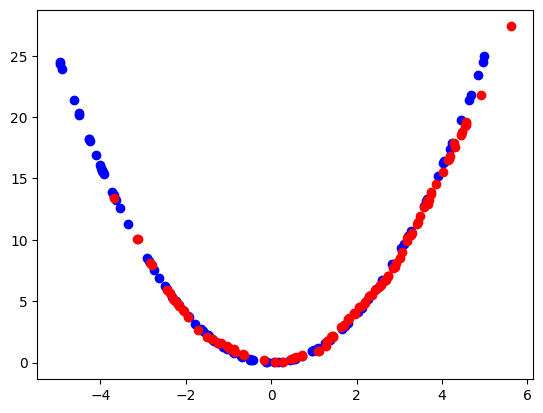

8500
2/2 [==============================] - 0s 3ms/step
8501
2/2 [==============================] - 0s 5ms/step
8502
2/2 [==============================] - 0s 5ms/step
8503
2/2 [==============================] - 0s 3ms/step
8504
2/2 [==============================] - 0s 4ms/step
8505
2/2 [==============================] - 0s 3ms/step
8506
2/2 [==============================] - 0s 6ms/step
8507
2/2 [==============================] - 0s 6ms/step
8508
2/2 [==============================] - 0s 6ms/step
8509
2/2 [==============================] - 0s 5ms/step
8510
2/2 [==============================] - 0s 4ms/step
8511
2/2 [==============================] - 0s 4ms/step
8512
2/2 [==============================] - 0s 5ms/step
8513
2/2 [==============================] - 0s 11ms/step
8514
2/2 [==============================] - 0s 5ms/step
8515
2/2 [==============================] - 0s 9ms/step
8516
2/2 [==============================] - 0s 7ms/step
8517
2/2 [==============================] - 0s 

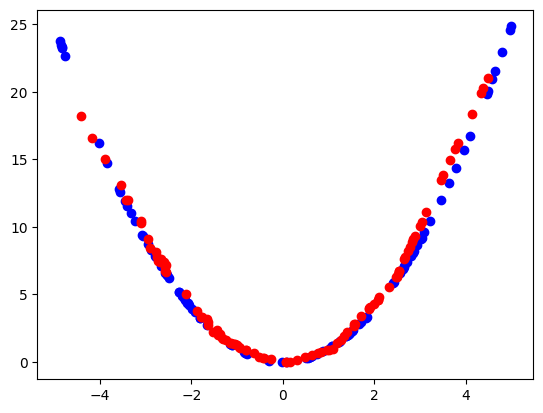

8600
2/2 [==============================] - 0s 5ms/step
8601
2/2 [==============================] - 0s 4ms/step
8602
2/2 [==============================] - 0s 5ms/step
8603
2/2 [==============================] - 0s 4ms/step
8604
2/2 [==============================] - 0s 6ms/step
8605
2/2 [==============================] - 0s 4ms/step
8606
2/2 [==============================] - 0s 4ms/step
8607
2/2 [==============================] - 0s 4ms/step
8608
2/2 [==============================] - 0s 8ms/step
8609
2/2 [==============================] - 0s 5ms/step
8610
2/2 [==============================] - 0s 3ms/step
8611
2/2 [==============================] - 0s 4ms/step
8612
2/2 [==============================] - 0s 5ms/step
8613
2/2 [==============================] - 0s 5ms/step
8614
2/2 [==============================] - 0s 3ms/step
8615
2/2 [==============================] - 0s 4ms/step
8616
2/2 [==============================] - 0s 4ms/step
8617
2/2 [==============================] - 0s 6

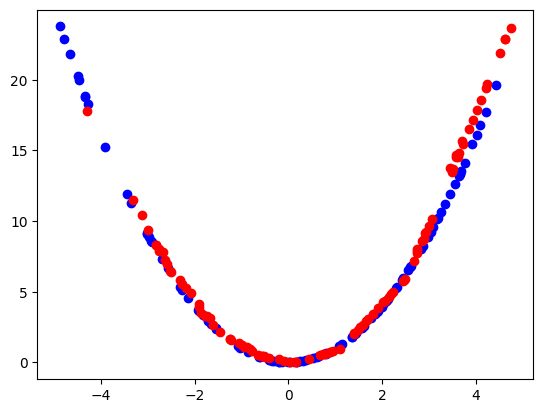

8700
2/2 [==============================] - 0s 4ms/step
8701
2/2 [==============================] - 0s 3ms/step
8702
2/2 [==============================] - 0s 5ms/step
8703
2/2 [==============================] - 0s 3ms/step
8704
2/2 [==============================] - 0s 6ms/step
8705
2/2 [==============================] - 0s 3ms/step
8706
2/2 [==============================] - 0s 5ms/step
8707
2/2 [==============================] - 0s 3ms/step
8708
2/2 [==============================] - 0s 4ms/step
8709
2/2 [==============================] - 0s 5ms/step
8710
2/2 [==============================] - 0s 5ms/step
8711
2/2 [==============================] - 0s 4ms/step
8712
2/2 [==============================] - 0s 6ms/step
8713
2/2 [==============================] - 0s 6ms/step
8714
2/2 [==============================] - 0s 4ms/step
8715
2/2 [==============================] - 0s 4ms/step
8716
2/2 [==============================] - 0s 6ms/step
8717
2/2 [==============================] - 0s 5

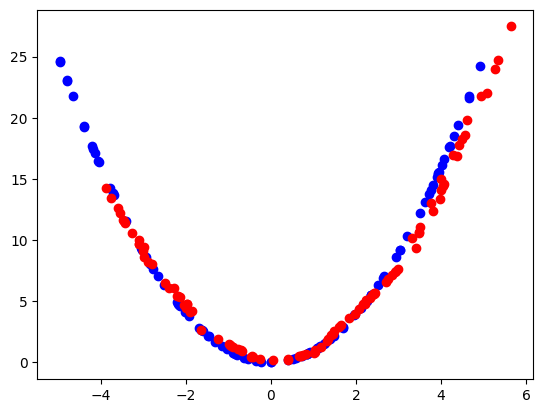

8800
2/2 [==============================] - 0s 4ms/step
8801
2/2 [==============================] - 0s 3ms/step
8802
2/2 [==============================] - 0s 4ms/step
8803
2/2 [==============================] - 0s 5ms/step
8804
2/2 [==============================] - 0s 5ms/step
8805
2/2 [==============================] - 0s 5ms/step
8806
2/2 [==============================] - 0s 3ms/step
8807
2/2 [==============================] - 0s 7ms/step
8808
2/2 [==============================] - 0s 9ms/step
8809
2/2 [==============================] - 0s 5ms/step
8810
2/2 [==============================] - 0s 4ms/step
8811
2/2 [==============================] - 0s 9ms/step
8812
2/2 [==============================] - 0s 3ms/step
8813
2/2 [==============================] - 0s 3ms/step
8814
2/2 [==============================] - 0s 6ms/step
8815
2/2 [==============================] - 0s 3ms/step
8816
2/2 [==============================] - 0s 3ms/step
8817
2/2 [==============================] - 0s 4

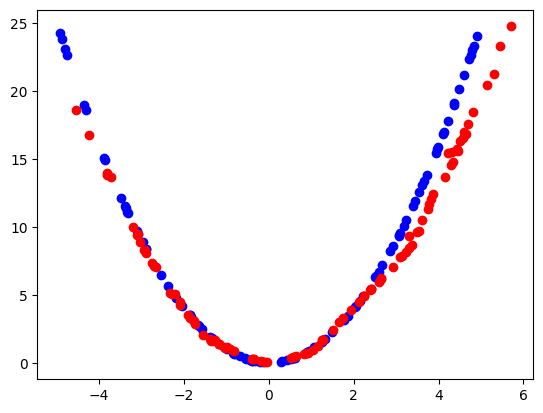

8900
2/2 [==============================] - 0s 5ms/step
8901
2/2 [==============================] - 0s 3ms/step
8902
2/2 [==============================] - 0s 4ms/step
8903
2/2 [==============================] - 0s 4ms/step
8904
2/2 [==============================] - 0s 4ms/step
8905
2/2 [==============================] - 0s 3ms/step
8906
2/2 [==============================] - 0s 5ms/step
8907
2/2 [==============================] - 0s 3ms/step
8908
2/2 [==============================] - 0s 6ms/step
8909
2/2 [==============================] - 0s 4ms/step
8910
2/2 [==============================] - 0s 4ms/step
8911
2/2 [==============================] - 0s 4ms/step
8912
2/2 [==============================] - 0s 5ms/step
8913
2/2 [==============================] - 0s 7ms/step
8914
2/2 [==============================] - 0s 7ms/step
8915
2/2 [==============================] - 0s 8ms/step
8916
2/2 [==============================] - 0s 4ms/step
8917
2/2 [==============================] - 0s 4

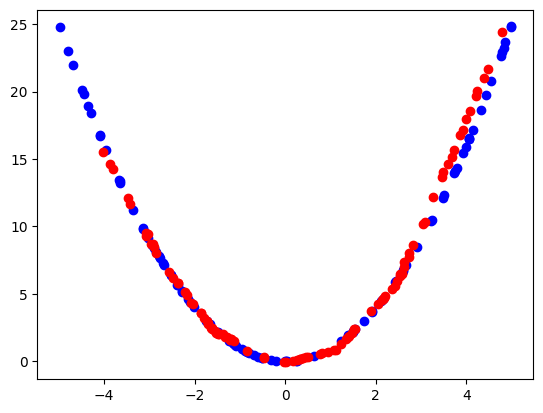

9000
2/2 [==============================] - 0s 8ms/step
9001
2/2 [==============================] - 0s 4ms/step
9002
2/2 [==============================] - 0s 3ms/step
9003
2/2 [==============================] - 0s 5ms/step
9004
2/2 [==============================] - 0s 8ms/step
9005
2/2 [==============================] - 0s 6ms/step
9006
2/2 [==============================] - 0s 7ms/step
9007
2/2 [==============================] - 0s 5ms/step
9008
2/2 [==============================] - 0s 9ms/step
9009
2/2 [==============================] - 0s 6ms/step
9010
2/2 [==============================] - 0s 13ms/step
9011
2/2 [==============================] - 0s 5ms/step
9012
2/2 [==============================] - 0s 6ms/step
9013
2/2 [==============================] - 0s 4ms/step
9014
2/2 [==============================] - 0s 4ms/step
9015
2/2 [==============================] - 0s 6ms/step
9016
2/2 [==============================] - 0s 4ms/step
9017
2/2 [==============================] - 0s 

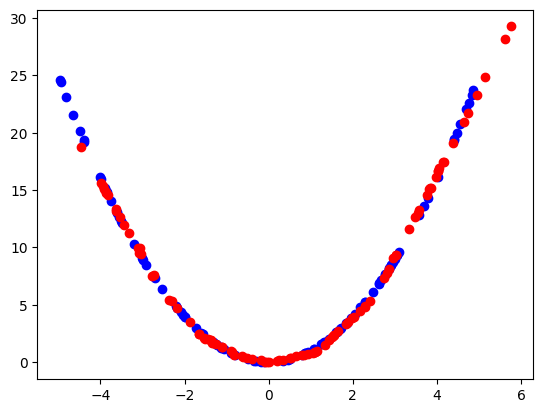

9100
2/2 [==============================] - 0s 3ms/step
9101
2/2 [==============================] - 0s 4ms/step
9102
2/2 [==============================] - 0s 6ms/step
9103
2/2 [==============================] - 0s 5ms/step
9104
2/2 [==============================] - 0s 5ms/step
9105
2/2 [==============================] - 0s 5ms/step
9106
2/2 [==============================] - 0s 5ms/step
9107
2/2 [==============================] - 0s 5ms/step
9108
2/2 [==============================] - 0s 6ms/step
9109
2/2 [==============================] - 0s 13ms/step
9110
2/2 [==============================] - 0s 7ms/step
9111
2/2 [==============================] - 0s 10ms/step
9112
2/2 [==============================] - 0s 4ms/step
9113
2/2 [==============================] - 0s 6ms/step
9114
2/2 [==============================] - 0s 5ms/step
9115
2/2 [==============================] - 0s 5ms/step
9116
2/2 [==============================] - 0s 3ms/step
9117
2/2 [==============================] - 0s

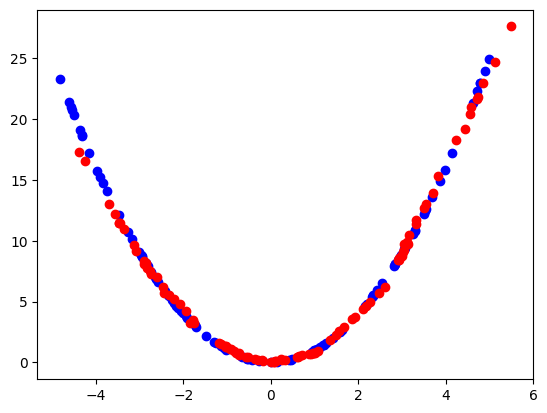

9200
2/2 [==============================] - 0s 4ms/step
9201
2/2 [==============================] - 0s 3ms/step
9202
2/2 [==============================] - 0s 3ms/step
9203
2/2 [==============================] - 0s 6ms/step
9204
2/2 [==============================] - 0s 7ms/step
9205
2/2 [==============================] - 0s 7ms/step
9206
2/2 [==============================] - 0s 7ms/step
9207
2/2 [==============================] - 0s 4ms/step
9208
2/2 [==============================] - 0s 4ms/step
9209
2/2 [==============================] - 0s 4ms/step
9210
2/2 [==============================] - 0s 6ms/step
9211
2/2 [==============================] - 0s 5ms/step
9212
2/2 [==============================] - 0s 3ms/step
9213
2/2 [==============================] - 0s 5ms/step
9214
2/2 [==============================] - 0s 4ms/step
9215
2/2 [==============================] - 0s 4ms/step
9216
2/2 [==============================] - 0s 6ms/step
9217
2/2 [==============================] - 0s 4

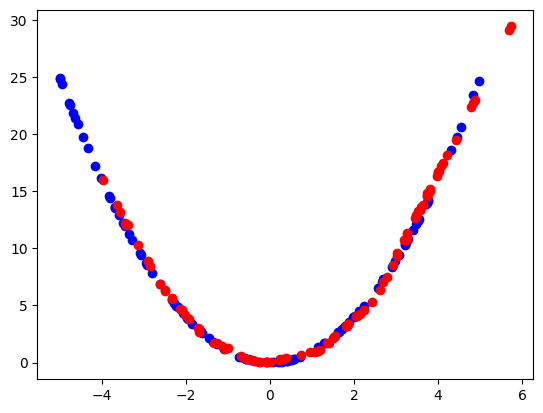

9300
2/2 [==============================] - 0s 4ms/step
9301
2/2 [==============================] - 0s 8ms/step
9302
2/2 [==============================] - 0s 3ms/step
9303
2/2 [==============================] - 0s 3ms/step
9304
2/2 [==============================] - 0s 3ms/step
9305
2/2 [==============================] - 0s 3ms/step
9306
2/2 [==============================] - 0s 4ms/step
9307
2/2 [==============================] - 0s 8ms/step
9308
2/2 [==============================] - 0s 7ms/step
9309
2/2 [==============================] - 0s 4ms/step
9310
2/2 [==============================] - 0s 4ms/step
9311
2/2 [==============================] - 0s 5ms/step
9312
2/2 [==============================] - 0s 6ms/step
9313
2/2 [==============================] - 0s 5ms/step
9314
2/2 [==============================] - 0s 5ms/step
9315
2/2 [==============================] - 0s 5ms/step
9316
2/2 [==============================] - 0s 5ms/step
9317
2/2 [==============================] - 0s 5

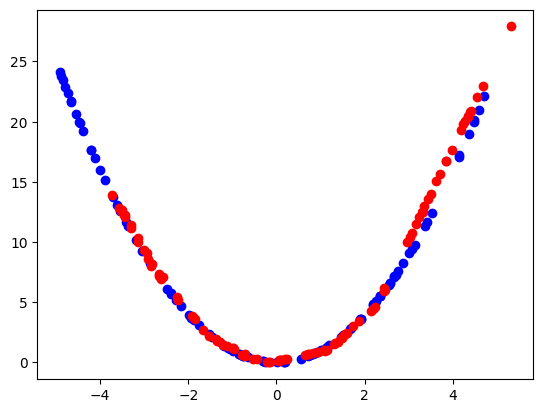

9400
2/2 [==============================] - 0s 4ms/step
9401
2/2 [==============================] - 0s 4ms/step
9402
2/2 [==============================] - 0s 4ms/step
9403
2/2 [==============================] - 0s 4ms/step
9404
2/2 [==============================] - 0s 5ms/step
9405
2/2 [==============================] - 0s 3ms/step
9406
2/2 [==============================] - 0s 9ms/step
9407
2/2 [==============================] - 0s 5ms/step
9408
2/2 [==============================] - 0s 4ms/step
9409
2/2 [==============================] - 0s 3ms/step
9410
2/2 [==============================] - 0s 4ms/step
9411
2/2 [==============================] - 0s 3ms/step
9412
2/2 [==============================] - 0s 4ms/step
9413
2/2 [==============================] - 0s 3ms/step
9414
2/2 [==============================] - 0s 4ms/step
9415
2/2 [==============================] - 0s 4ms/step
9416
2/2 [==============================] - 0s 4ms/step
9417
2/2 [==============================] - 0s 4

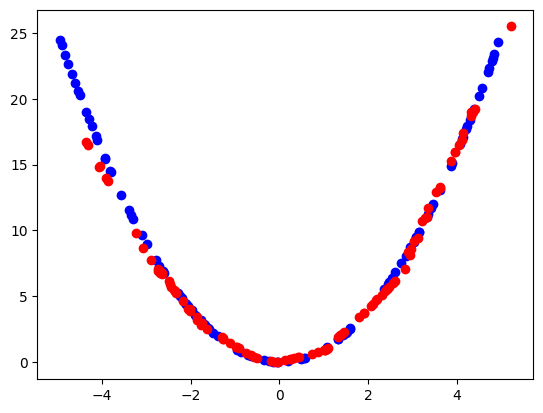

9500
2/2 [==============================] - 0s 3ms/step
9501
2/2 [==============================] - 0s 3ms/step
9502
2/2 [==============================] - 0s 4ms/step
9503
2/2 [==============================] - 0s 7ms/step
9504
2/2 [==============================] - 0s 8ms/step
9505
2/2 [==============================] - 0s 4ms/step
9506
2/2 [==============================] - 0s 5ms/step
9507
2/2 [==============================] - 0s 4ms/step
9508
2/2 [==============================] - 0s 5ms/step
9509
2/2 [==============================] - 0s 6ms/step
9510
2/2 [==============================] - 0s 6ms/step
9511
2/2 [==============================] - 0s 4ms/step
9512
2/2 [==============================] - 0s 5ms/step
9513
2/2 [==============================] - 0s 4ms/step
9514
2/2 [==============================] - 0s 5ms/step
9515
2/2 [==============================] - 0s 6ms/step
9516
2/2 [==============================] - 0s 6ms/step
9517
2/2 [==============================] - 0s 5

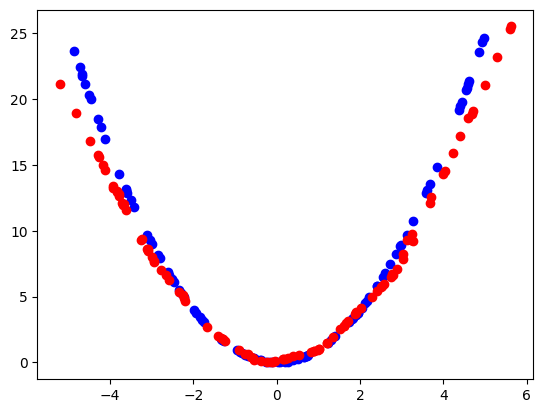

9600
2/2 [==============================] - 0s 4ms/step
9601
2/2 [==============================] - 0s 4ms/step
9602
2/2 [==============================] - 0s 4ms/step
9603
2/2 [==============================] - 0s 3ms/step
9604
2/2 [==============================] - 0s 7ms/step
9605
2/2 [==============================] - 0s 7ms/step
9606
2/2 [==============================] - 0s 10ms/step
9607
2/2 [==============================] - 0s 4ms/step
9608
2/2 [==============================] - 0s 6ms/step
9609
2/2 [==============================] - 0s 5ms/step
9610
2/2 [==============================] - 0s 7ms/step
9611
2/2 [==============================] - 0s 9ms/step
9612
2/2 [==============================] - 0s 4ms/step
9613
2/2 [==============================] - 0s 3ms/step
9614
2/2 [==============================] - 0s 5ms/step
9615
2/2 [==============================] - 0s 7ms/step
9616
2/2 [==============================] - 0s 6ms/step
9617
2/2 [==============================] - 0s 

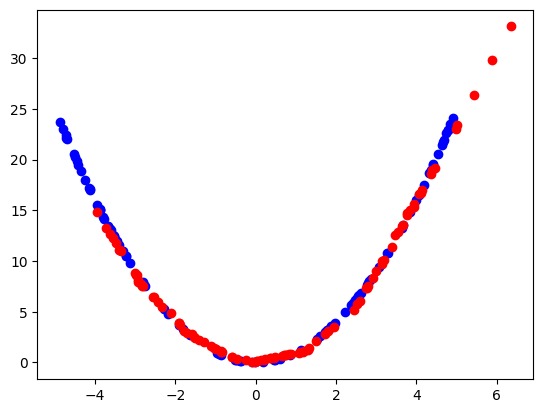

9700
2/2 [==============================] - 0s 4ms/step
9701
2/2 [==============================] - 0s 3ms/step
9702
2/2 [==============================] - 0s 3ms/step
9703
2/2 [==============================] - 0s 4ms/step
9704
2/2 [==============================] - 0s 6ms/step
9705
2/2 [==============================] - 0s 6ms/step
9706
2/2 [==============================] - 0s 6ms/step
9707
2/2 [==============================] - 0s 5ms/step
9708
2/2 [==============================] - 0s 4ms/step
9709
2/2 [==============================] - 0s 3ms/step
9710
2/2 [==============================] - 0s 9ms/step
9711
2/2 [==============================] - 0s 5ms/step
9712
2/2 [==============================] - 0s 4ms/step
9713
2/2 [==============================] - 0s 5ms/step
9714
2/2 [==============================] - 0s 6ms/step
9715
2/2 [==============================] - 0s 4ms/step
9716
2/2 [==============================] - 0s 4ms/step
9717
2/2 [==============================] - 0s 6

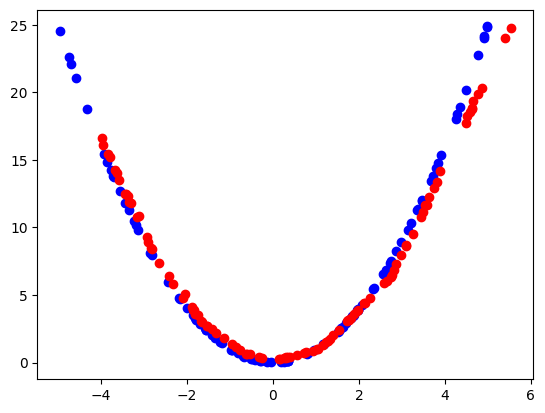

9800
2/2 [==============================] - 0s 5ms/step
9801
2/2 [==============================] - 0s 5ms/step
9802
2/2 [==============================] - 0s 3ms/step
9803
2/2 [==============================] - 0s 3ms/step
9804
2/2 [==============================] - 0s 6ms/step
9805
2/2 [==============================] - 0s 3ms/step
9806
2/2 [==============================] - 0s 6ms/step
9807
2/2 [==============================] - 0s 3ms/step
9808
2/2 [==============================] - 0s 5ms/step
9809
2/2 [==============================] - 0s 4ms/step
9810
2/2 [==============================] - 0s 4ms/step
9811
2/2 [==============================] - 0s 5ms/step
9812
2/2 [==============================] - 0s 5ms/step
9813
2/2 [==============================] - 0s 4ms/step
9814
2/2 [==============================] - 0s 7ms/step
9815
2/2 [==============================] - 0s 3ms/step
9816
2/2 [==============================] - 0s 4ms/step
9817
2/2 [==============================] - 0s 6

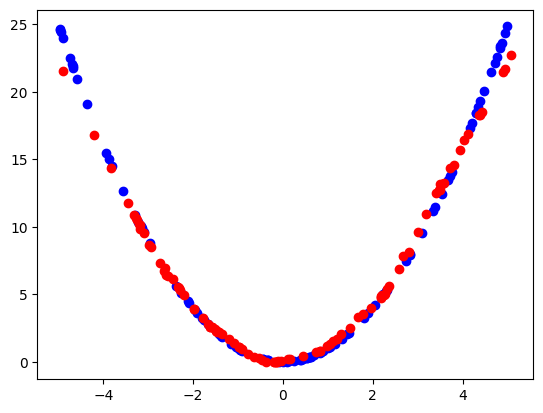

9900
2/2 [==============================] - 0s 6ms/step
9901
2/2 [==============================] - 0s 4ms/step
9902
2/2 [==============================] - 0s 5ms/step
9903
2/2 [==============================] - 0s 5ms/step
9904
2/2 [==============================] - 0s 4ms/step
9905
2/2 [==============================] - 0s 4ms/step
9906
2/2 [==============================] - 0s 5ms/step
9907
2/2 [==============================] - 0s 4ms/step
9908
2/2 [==============================] - 0s 4ms/step
9909
2/2 [==============================] - 0s 7ms/step
9910
2/2 [==============================] - 0s 3ms/step
9911
2/2 [==============================] - 0s 3ms/step
9912
2/2 [==============================] - 0s 4ms/step
9913
2/2 [==============================] - 0s 3ms/step
9914
2/2 [==============================] - 0s 3ms/step
9915
2/2 [==============================] - 0s 7ms/step
9916
2/2 [==============================] - 0s 5ms/step
9917
2/2 [==============================] - 0s 6

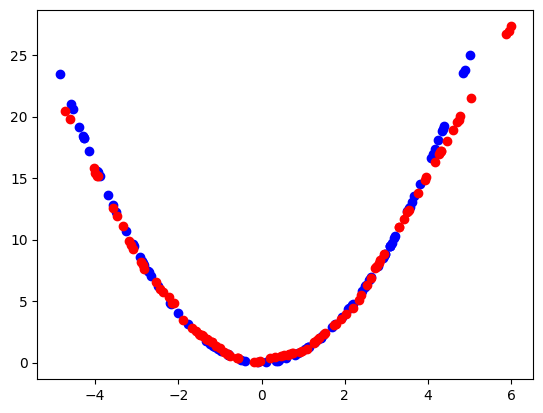

In [14]:
train(generator, discriminator, gan_model, latent_dim, n_epochs = 10_000)

# f. Generation

In [15]:
x_gen, _ = generate_fake_samples(generator, 5, 100)

4/4 [==============================] - 0s 2ms/step


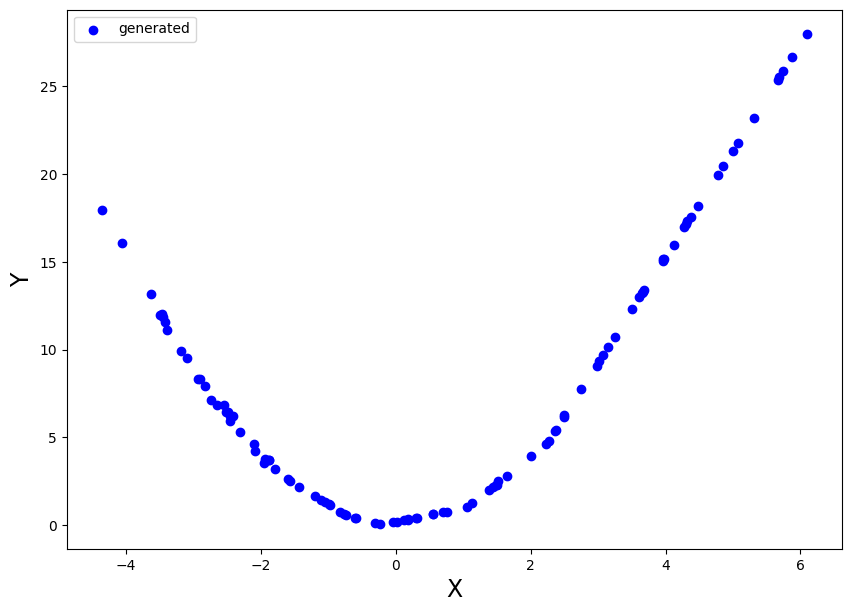

In [16]:
plt.figure(figsize = (10, 7))
plt.scatter(x_gen[:, 0], x_gen[:, 1], label = 'generated', color = 'blue')
plt.xlabel('X', fontsize = 17)
plt.ylabel('Y', fontsize = 17)
plt.legend()
plt.show()

# g. Performance

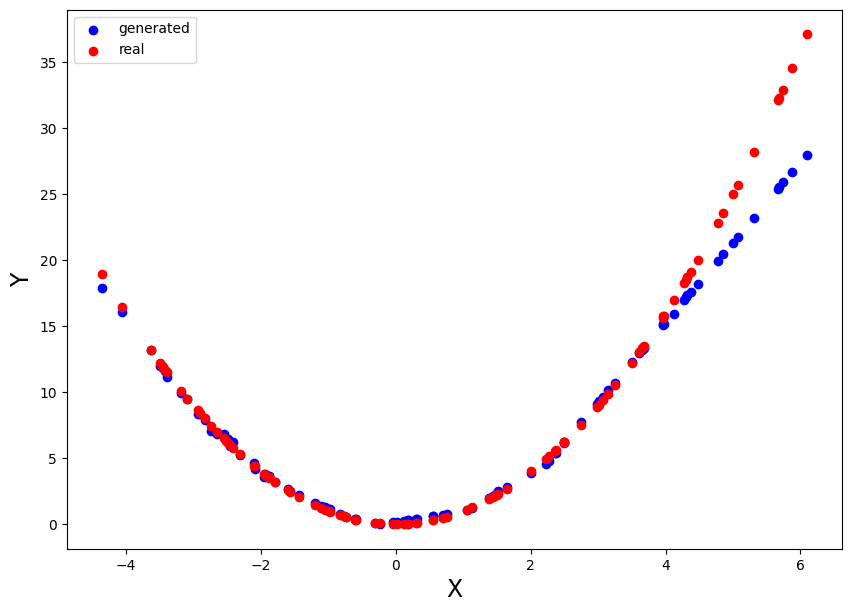

In [17]:
plt.figure(figsize = (10, 7))
plt.scatter(x_gen[:, 0], x_gen[:, 1], label = 'generated', color = 'blue')
plt.scatter(x_gen[:, 0], x_gen[:, 0]*x_gen[:, 0], label = 'real', color = 'red')
plt.xlabel('X', fontsize = 17)
plt.ylabel('Y', fontsize = 17)
plt.legend()
plt.show()

In [18]:
print('Abs error:', round(abs(x_gen[:, 1] - x_gen[:, 0]*x_gen[:, 0]).mean(), 2))

Abs error: 0.81


In [19]:
print('MSE:', round((abs(x_gen[:, 1] - x_gen[:, 0]*x_gen[:, 0])**2).mean(), 2))

MSE: 3.75


### End time of execution

In [20]:
end = time.time()

In [21]:
print(print_time_execution(start, end, 'this notebook'))

this notebook it takes 0 hours, 20 mins and 53 segs.
